*Rookie vs Veteran*

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assume the file is uploaded to Google Colab
data_path = '/content/drive/MyDrive/final.xlsx'  # Replace with your file path
df = pd.read_excel(data_path)

# Display the first few rows of the dataframe
df.head()

# Check for missing values and data types
df.info()

# Basic statistics to understand the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source.Name  2847 non-null   object 
 1   Player       2847 non-null   object 
 2   Pos          2847 non-null   object 
 3   Age          2847 non-null   int64  
 4   Tm           2847 non-null   object 
 5   G            2847 non-null   int64  
 6   MP           2847 non-null   float64
 7   FG%          2825 non-null   float64
 8   3P%          2681 non-null   float64
 9   FT%          2651 non-null   float64
 10  TRB          2847 non-null   float64
 11  AST          2847 non-null   float64
 12  STL          2847 non-null   float64
 13  BLK          2847 non-null   float64
 14  TOV          2847 non-null   float64
 15  PTS          2847 non-null   float64
 16  PER          2847 non-null   float64
 17  USG%         2847 non-null   float64
 18  WS           2847 non-null   float64
 19  BPM   

,Age,G,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PTS,PER,USG%,WS,BPM,VORP
count,2847.000000,2847.000000,2847.000000,2825.000000,2681.000000,2651.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000
mean,25.935371,38.796979,19.049982,0.445712,0.314953,0.749001,3.476923,1.895996,0.602564,0.383281,1.051352,8.409484,12.679276,18.259571,1.809905,-1.906322,0.418651
std,4.124559,23.993679,9.348301,0.120489,0.132587,0.151002,2.362733,1.814891,0.405389,0.386574,0.810865,6.314893,6.760173,5.817573,2.264479,4.935641,1.033324
min,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.200000,0.000000,-1.900000,-46.600000,-1.700000
25%,23.000000,17.000000,11.750000,0.399000,0.277000,0.679000,1.800000,0.700000,0.300000,0.100000,0.500000,3.800000,9.500000,14.400000,0.100000,-3.700000,-0.100000
50%,25.000000,40.000000,18.500000,0.444000,0.338000,0.769000,3.000000,1.300000,0.500000,0.300000,0.900000,6.900000,12.600000,17.600000,0.900000,-1.500000,0.000000
75%,29.000000,61.000000,26.800000,0.500000,0.383000,0.843000,4.600000,2.500000,0.800000,0.500000,1.400000,11.300000,16.200000,21.300000,2.800000,0.500000,0.600000
max,43.000000,83.000000,43.500000,1.000000,1.000000,1.000000,15.800000,11.700000,3.000000,3.400000,5.000000,34.300000,76.200000,54.600000,15.600000,48.600000,9.800000


In [ ]:
df.columns

Index(['Source.Name', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%',
       'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS',
       'BPM', 'VORP'],
      dtype='object')

In [ ]:
df.shape

(2847, 21)

In [ ]:
import pandas as pd

# Load the two CSV files
file1_path = "/content/drive/MyDrive/basketball_reference_per_game_stats_2023_2024.csv"  # Path to the first file
file2_path = "/content/drive/MyDrive/nba_advanced_stats_2023_2024.csv"  # Path to the second file

# Load the datasets
df_per_game = pd.read_csv(file1_path)
df_advanced = pd.read_csv(file2_path)

# Display the first few rows of each DataFrame to understand their structure
print("First few rows of the per game stats DataFrame (df_per_game):")
print(df_per_game.head())

print("\nFirst few rows of the advanced stats DataFrame (df_advanced):")
print(df_advanced.head())

# Ensure that 'Player' and 'Tm' columns are string types for consistency in merging
df_per_game['Player'] = df_per_game['Player'].astype(str)
df_per_game['Tm'] = df_per_game['Tm'].astype(str)
df_advanced['Player'] = df_advanced['Player'].astype(str)
df_advanced['Tm'] = df_advanced['Tm'].astype(str)

# Filter the per game DataFrame to only include rows that have matching 'Player' and 'Tm' in the advanced DataFrame
df_filtered = df_per_game[df_per_game[['Player', 'Tm']].apply(tuple, 1).isin(df_advanced[['Player', 'Tm']].apply(tuple, 1))]

# Merge the filtered per game DataFrame with the advanced DataFrame using an inner join
df_merged = pd.merge(df_filtered, df_advanced, on=['Player', 'Tm'], how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(df_merged.head())

# Get the dimensions of the final merged DataFrame
rows, columns = df_merged.shape
print(f"\nDimensions of the final merged DataFrame: {rows} rows and {columns} columns")

# Save the merged DataFrame to a new CSV file
#output_path = "/content/drive/MyDrive/merged_dataset_filtered.csv"
#df_merged.to_csv(output_path, index=False)

#print(f"Merged DataFrame saved to {output_path}")


First few rows of the per game stats DataFrame (df_per_game):
             Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0  Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  0.501  ...   
1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  0.459  ...   
2  Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   6.1  0.525  ...   
3       Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  0.521  ...   
4      Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  0.411  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.616  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  
1  0.571  2.0  3.4   5.4  1.8  0.6  0.5  1.2  1.6   7.7  
2  0.643  2.9  4.3   7.2  1.1  0.6  1.1  1.1  2.1   7.6  
3  0.755  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  
4  0.661  0.9  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8  

[5 rows x 29 columns]

First few rows of the advanced stats DataFrame (df_advanced):
             Player Pos  Age   Tm   G    MP   P

In [ ]:
import pandas as pd

# Assuming df_merged is your already merged DataFrame

# Add a new column 'Source.Name' and fill it with the dataset name
df_merged['Source.Name'] = 'basketball_reference_per_game_stats_2023_2024.csv'

# Display the updated DataFrame with the new column
print("\nUpdated Merged DataFrame with Source.Name:")
print(df_merged.head())

# Save the updated DataFrame to a new CSV file if needed
# df_merged.to_csv('merged_with_source.csv', index=False)

df_merged.shape



Updated Merged DataFrame with Source.Name:
                     Player Pos_x  Age_x   Tm  G_x  GS  MP_x   FG   FGA  \
0          Precious Achiuwa     C     24  TOR   25   0  17.5  3.1   6.8   
1               Bam Adebayo     C     26  MIA   71  71  34.0  7.5  14.3   
2              Ochai Agbaji    SG     23  UTA   51  10  19.7  2.1   4.9   
3              Santi Aldama    PF     23  MEM   61  35  26.5  4.0   9.3   
4  Nickeil Alexander-Walker    SG     25  MIN   82  20  23.4  2.9   6.6   

     FG%  ...  OWS  DWS   WS  WS/48   .1  OBPM  DBPM  BPM  VORP  \
0  0.459  ...  0.8  1.4  2.2  0.093  NaN  -1.4  -0.8 -2.3  -0.1   
1  0.521  ...  3.6  3.8  7.4  0.137  NaN   0.8   0.8  1.5   2.3   
2  0.426  ...  0.9  0.4  1.3  0.053  NaN  -1.7  -1.4 -3.0  -0.3   
3  0.435  ...  2.1  2.4  4.6  0.130  NaN  -0.3   0.8  0.5   1.1   
4  0.439  ...  0.0  0.3  0.3  0.044  NaN  -2.5  -0.5 -3.0  -0.1   

                                         Source.Name  
0  basketball_reference_per_game_stats_2023_202

(324, 56)

In [ ]:
import pandas as pd

# Assuming df_per_game and df_advanced are already loaded and merged as df_merged

# Selecting specific columns from df_per_game and df_advanced
columns_to_keep = ['Source.Name','Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'MP_x', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP']

# Create a new DataFrame with the selected columns
final_df = df_merged[columns_to_keep]

# Display the first few rows of the final DataFrame
print(final_df.head())

final_df.shape


                                         Source.Name  \
0  basketball_reference_per_game_stats_2023_2024.csv   
1  basketball_reference_per_game_stats_2023_2024.csv   
2  basketball_reference_per_game_stats_2023_2024.csv   
3  basketball_reference_per_game_stats_2023_2024.csv   
4  basketball_reference_per_game_stats_2023_2024.csv   

                     Player Pos_x  Age_x   Tm  G_x  MP_x    FG%    3P%    FT%  \
0          Precious Achiuwa     C     24  TOR   25  17.5  0.459  0.277  0.571   
1               Bam Adebayo     C     26  MIA   71  34.0  0.521  0.357  0.755   
2              Ochai Agbaji    SG     23  UTA   51  19.7  0.426  0.331  0.750   
3              Santi Aldama    PF     23  MEM   61  26.5  0.435  0.349  0.621   
4  Nickeil Alexander-Walker    SG     25  MIN   82  23.4  0.439  0.391  0.800   

   ...  AST  STL  BLK  TOV   PTS   PER  USG%   WS  BPM  VORP  
0  ...  1.8  0.6  0.5  1.2   7.7  15.2  19.4  2.2 -2.3  -0.1  
1  ...  3.9  1.1  0.9  2.3  19.3  20.1  25.2  7.4 

(324, 21)

In [ ]:
final_df.columns

Index(['Source.Name', 'Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'MP_x', 'FG%',
       '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%',
       'WS', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
df.columns

Index(['Source.Name', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%',
       'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS',
       'BPM', 'VORP'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming final_df and df are your dataframes with the columns as described

# Display shapes and column names before concatenation
print("Shape of final_df before concatenation:", final_df.shape)
print("Columns of final_df before concatenation:")
print(final_df.columns)

print("\nShape of df before concatenation:", df.shape)
print("Columns of df before concatenation:")
print(df.columns)

# Concatenate them vertically and reset index while ignoring existing indices
df_concatenated = pd.concat([final_df, df], ignore_index=True)

# Display the shape and columns of the concatenated dataframe
print("\nShape of concatenated DataFrame:", df_concatenated.shape)
print("Columns of concatenated DataFrame:")
print(df_concatenated.columns)


Shape of final_df before concatenation: (324, 21)
Columns of final_df before concatenation:
Index(['Source.Name', 'Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'MP_x', 'FG%',
       '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%',
       'WS', 'BPM', 'VORP'],
      dtype='object')

Shape of df before concatenation: (2847, 21)
Columns of df before concatenation:
Index(['Source.Name', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%',
       'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS',
       'BPM', 'VORP'],
      dtype='object')

Shape of concatenated DataFrame: (3171, 25)
Columns of concatenated DataFrame:
Index(['Source.Name', 'Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'MP_x', 'FG%',
       '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%',
       'WS', 'BPM', 'VORP', 'Pos', 'Age', 'G', 'MP'],
      dtype='object')


In [ ]:
df = df_concatenated[['Source.Name', 'Player', 'Tm', 'FG%',
       '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%',
       'WS', 'BPM', 'VORP', 'Pos', 'Age', 'G', 'MP']]

In [ ]:
df.shape

(3171, 21)

In [ ]:
# Filter out rows where 'Tm' is 'TOT'
df_filtered = df[df['Tm'] != 'TOT']

# Display the first few rows of the filtered DataFrame
print("\nFiltered DataFrame (without 'TOT' in 'Tm' column):")
print(df_filtered.head())


Filtered DataFrame (without 'TOT' in 'Tm' column):
                                         Source.Name  \
0  basketball_reference_per_game_stats_2023_2024.csv   
1  basketball_reference_per_game_stats_2023_2024.csv   
2  basketball_reference_per_game_stats_2023_2024.csv   
3  basketball_reference_per_game_stats_2023_2024.csv   
4  basketball_reference_per_game_stats_2023_2024.csv   

                     Player   Tm    FG%    3P%    FT%   TRB  AST  STL  BLK  \
0          Precious Achiuwa  TOR  0.459  0.277  0.571   5.4  1.8  0.6  0.5   
1               Bam Adebayo  MIA  0.521  0.357  0.755  10.4  3.9  1.1  0.9   
2              Ochai Agbaji  UTA  0.426  0.331  0.750   2.5  0.9  0.5  0.6   
3              Santi Aldama  MEM  0.435  0.349  0.621   5.8  2.3  0.7  0.9   
4  Nickeil Alexander-Walker  MIN  0.439  0.391  0.800   2.0  2.5  0.8  0.5   

   ...   PTS   PER  USG%   WS  BPM  VORP  Pos Age   G  MP  
0  ...   7.7  15.2  19.4  2.2 -2.3  -0.1  NaN NaN NaN NaN  
1  ...  19.3  20.1  25

In [ ]:
df_filtered.shape

(2859, 21)

In [ ]:
# Step 2: Drop rows with any null values
df_cleaned = df_filtered.dropna()

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame (without 'TOT' in 'Tm' column and no null values):")
print(df_cleaned.head())


Cleaned DataFrame (without 'TOT' in 'Tm' column and no null values):
                                           Source.Name  \
324  basketball_reference_per_game_stats_2019_2020.csv   
325  basketball_reference_per_game_stats_2019_2020.csv   
326  basketball_reference_per_game_stats_2019_2020.csv   
328  basketball_reference_per_game_stats_2019_2020.csv   
329  basketball_reference_per_game_stats_2019_2020.csv   

                       Player   Tm    FG%    3P%    FT%   TRB  AST  STL  BLK  \
324              Steven Adams  OKC  0.592  0.333  0.582   9.3  2.3  0.8  1.1   
325               Bam Adebayo  MIA  0.557  0.143  0.691  10.2  5.1  1.1  1.3   
326         LaMarcus Aldridge  SAS  0.493  0.389  0.827   7.4  2.4  0.7  1.6   
328  Nickeil Alexander-Walker  NOP  0.368  0.346  0.676   1.8  1.9  0.4  0.2   
329             Grayson Allen  MEM  0.466  0.404  0.867   2.2  1.4  0.3  0.1   

     ...   PTS   PER  USG%   WS  BPM  VORP  Pos   Age     G    MP  
324  ...  10.9  20.5  17.3  6.5 

In [ ]:
df_cleaned.shape

(2255, 21)

In [ ]:
df_cleaned.head()

,Source.Name,Player,Tm,FG%,3P%,FT%,TRB,AST,STL,BLK,...,PTS,PER,USG%,WS,BPM,VORP,Pos,Age,G,MP
324,basketball_reference_per_game_stats_2019_2020.csv,Steven Adams,OKC,0.592,0.333,0.582,9.3,2.3,0.8,1.1,...,10.9,20.5,17.3,6.5,2.9,2.1,C,26.0,63.0,26.7
325,basketball_reference_per_game_stats_2019_2020.csv,Bam Adebayo,MIA,0.557,0.143,0.691,10.2,5.1,1.1,1.3,...,15.9,20.3,21.2,8.5,3.4,3.3,PF,22.0,72.0,33.6
326,basketball_reference_per_game_stats_2019_2020.csv,LaMarcus Aldridge,SAS,0.493,0.389,0.827,7.4,2.4,0.7,1.6,...,18.9,19.7,23.4,4.5,1.4,1.5,C,34.0,53.0,33.1
328,basketball_reference_per_game_stats_2019_2020.csv,Nickeil Alexander-Walker,NOP,0.368,0.346,0.676,1.8,1.9,0.4,0.2,...,5.7,8.9,23.3,-0.2,-4.6,-0.4,SG,21.0,47.0,12.6
329,basketball_reference_per_game_stats_2019_2020.csv,Grayson Allen,MEM,0.466,0.404,0.867,2.2,1.4,0.3,0.1,...,8.7,12.0,17.6,1.2,-1.3,0.1,SG,24.0,38.0,18.9


In [ ]:
# Extract the season year from the 'Source.Name' column
df_cleaned['Season'] = df_cleaned['Source.Name'].str.extract(r'(\d{4}_\d{4})')[0]

# Convert the extracted 'Season' field to a list of individual seasons
df_cleaned['Season'] = df_cleaned['Season'].str.split('_').apply(lambda x: [int(year) for year in x])

# Group by 'Player' and count the unique seasons they have played
df_cleaned['Seasons_Played'] = df_cleaned.groupby('Player')['Season'].transform(lambda x: len(set(year for years in x for year in years)))

# Create a new column 'Player_Season' by combining the player name with the number of seasons played
df_cleaned['Player_Season'] = df_cleaned['Player'] + ' (' + df_cleaned['Seasons_Played'].astype(str) + ' Seasons)'

# Preview the updated DataFrame
print(df_cleaned[['Player', 'Seasons_Played', 'Player_Season']].head())

                       Player  Seasons_Played  \
324              Steven Adams               5   
325               Bam Adebayo               5   
326         LaMarcus Aldridge               4   
328  Nickeil Alexander-Walker               5   
329             Grayson Allen               5   

                            Player_Season  
324              Steven Adams (5 Seasons)  
325               Bam Adebayo (5 Seasons)  
326         LaMarcus Aldridge (4 Seasons)  
328  Nickeil Alexander-Walker (5 Seasons)  
329             Grayson Allen (5 Seasons)  


<ipython-input-61-179f24aacd70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Source.Name'].str.extract(r'(\d{4}_\d{4})')[0]
<ipython-input-61-179f24aacd70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Season'].str.split('_').apply(lambda x: [int(year) for year in x])
<ipython-input-61-179f24aacd70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [ ]:
df_cleaned.shape

(2255, 24)

In [ ]:
df_cleaned.head()

,Source.Name,Player,Tm,FG%,3P%,FT%,TRB,AST,STL,BLK,...,WS,BPM,VORP,Pos,Age,G,MP,Season,Seasons_Played,Player_Season
324,basketball_reference_per_game_stats_2019_2020.csv,Steven Adams,OKC,0.592,0.333,0.582,9.3,2.3,0.8,1.1,...,6.5,2.9,2.1,C,26.0,63.0,26.7,"[2019, 2020]",5,Steven Adams (5 Seasons)
325,basketball_reference_per_game_stats_2019_2020.csv,Bam Adebayo,MIA,0.557,0.143,0.691,10.2,5.1,1.1,1.3,...,8.5,3.4,3.3,PF,22.0,72.0,33.6,"[2019, 2020]",5,Bam Adebayo (5 Seasons)
326,basketball_reference_per_game_stats_2019_2020.csv,LaMarcus Aldridge,SAS,0.493,0.389,0.827,7.4,2.4,0.7,1.6,...,4.5,1.4,1.5,C,34.0,53.0,33.1,"[2019, 2020]",4,LaMarcus Aldridge (4 Seasons)
328,basketball_reference_per_game_stats_2019_2020.csv,Nickeil Alexander-Walker,NOP,0.368,0.346,0.676,1.8,1.9,0.4,0.2,...,-0.2,-4.6,-0.4,SG,21.0,47.0,12.6,"[2019, 2020]",5,Nickeil Alexander-Walker (5 Seasons)
329,basketball_reference_per_game_stats_2019_2020.csv,Grayson Allen,MEM,0.466,0.404,0.867,2.2,1.4,0.3,0.1,...,1.2,-1.3,0.1,SG,24.0,38.0,18.9,"[2019, 2020]",5,Grayson Allen (5 Seasons)


In [ ]:
# Drop the 'Season' column used for calculation (optional)
df_cleaned.drop(columns=['Season', 'Player_Season'], inplace=True)
df_cleaned.shape

<ipython-input-64-e96b40be3b66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Season', 'Player_Season'], inplace=True)


(2255, 22)

In [ ]:
import pandas as pd

# Assuming df_cleaned is your DataFrame with 'Seasons_Played' calculated
# Group by 'Player' and aggregate statistics
df_cleaned = df_cleaned.groupby('Player').agg({
    'Pos': 'first',                # Take the first position
    'Age': 'first',                # Take the first age
    'Tm': 'first',                 # Take the first team
    'G': 'sum',                    # Sum of games played
    'MP': 'sum',                   # Sum of minutes played
    'FG%': 'mean',                 # Mean field goal percentage
    '3P%': 'mean',                 # Mean 3-point percentage
    'FT%': 'mean',                 # Mean free throw percentage
    'TRB': 'sum',                  # Sum of rebounds
    'AST': 'sum',                  # Sum of assists
    'STL': 'sum',                  # Sum of steals
    'BLK': 'sum',                  # Sum of blocks
    'TOV': 'sum',                  # Sum of turnovers
    'PTS': 'sum',                  # Sum of points
    'PER': 'mean',                 # Mean player efficiency rating
    'USG%': 'mean',                # Mean usage percentage
    'WS': 'sum',                   # Sum of win shares
    'BPM': 'mean',                 # Mean box plus/minus
    'VORP': 'sum',                 # Sum of value over replacement player
    'Seasons_Played': 'first',     # Take the first value of Seasons_Played
}).reset_index()

# Export the aggregated DataFrame to a CSV file
#df_cleaned.to_csv('df_aggregated.csv', index=False)

# Display the aggregated DataFrame
print(df_cleaned)


              Player Pos   Age   Tm      G     MP       FG%       3P%     FT%  \
0         A.J. Green  SG  23.0  MIL   35.0    9.9  0.424000  0.419000  1.0000   
1        A.J. Lawson  SG  22.0  DAL   14.0    7.6  0.488000  0.400000  0.2500   
2         AJ Griffin  SF  19.0  ATL   72.0   19.5  0.465000  0.390000  0.8940   
3       Aaron Gordon  PF  24.0  ORL  255.0  149.7  0.491600  0.326200  0.6718   
4      Aaron Holiday  PG  23.0  IND  258.0   88.2  0.420000  0.391600  0.8506   
..               ...  ..   ...  ...    ...    ...       ...       ...     ...   
775   Zavier Simpson  PG  24.0  OKC    4.0   43.5  0.365000  0.125000  1.0000   
776       Zeke Nnaji  PF  20.0  DEN  136.0   40.2  0.519333  0.377333  0.6920   
777     Zhaire Smith  SF  20.0  PHI    7.0    4.6  0.273000  0.000000  0.5000   
778  Ziaire Williams  SF  20.0  MEM   99.0   36.9  0.439500  0.286000  0.7775   
779  Zion Williamson  PF  19.0  NOP  114.0   94.0  0.600667  0.363667  0.6840   

      TRB  ...  STL  BLK  T

In [ ]:
df_cleaned.shape

(780, 21)

              Player Pos   Age   Tm      G     MP       FG%       3P%     FT%  \
0         A.J. Green  SG  23.0  MIL   35.0    9.9  0.424000  0.419000  1.0000   
1        A.J. Lawson  SG  22.0  DAL   14.0    7.6  0.488000  0.400000  0.2500   
2         AJ Griffin  SF  19.0  ATL   72.0   19.5  0.465000  0.390000  0.8940   
3       Aaron Gordon  PF  24.0  ORL  255.0  149.7  0.491600  0.326200  0.6718   
4      Aaron Holiday  PG  23.0  IND  258.0   88.2  0.420000  0.391600  0.8506   
..               ...  ..   ...  ...    ...    ...       ...       ...     ...   
775   Zavier Simpson  PG  24.0  OKC    4.0   43.5  0.365000  0.125000  1.0000   
776       Zeke Nnaji  PF  20.0  DEN  136.0   40.2  0.519333  0.377333  0.6920   
777     Zhaire Smith  SF  20.0  PHI    7.0    4.6  0.273000  0.000000  0.5000   
778  Ziaire Williams  SF  20.0  MEM   99.0   36.9  0.439500  0.286000  0.7775   
779  Zion Williamson  PF  19.0  NOP  114.0   94.0  0.600667  0.363667  0.6840   

      TRB  ...  STL  BLK  T

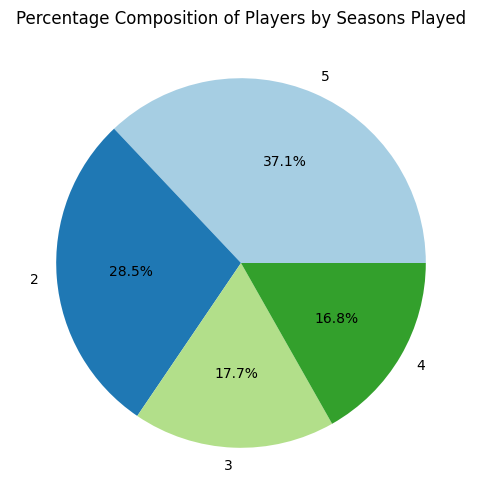

In [ ]:
# Group by 'Seasons_Played' and count the number of players in each group
seasons_distribution = df_cleaned['Seasons_Played'].value_counts()

# Calculate percentage composition
seasons_percentage = (seasons_distribution / seasons_distribution.sum()) * 100

# Display the DataFrame
print(df_cleaned)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(seasons_percentage, labels=seasons_percentage.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(seasons_percentage))))
plt.title('Percentage Composition of Players by Seasons Played')
plt.show()

In [ ]:
df_cleaned['Seasons_Played'].value_counts()

,count
Seasons_Played,
5,289
2,222
3,138
4,131


In [ ]:
# Example array of seasons played
seasons_played = [5, 4, 2, 3]

# Define a threshold for classifying rookies and veterans
rookie_threshold = 4

# Add a column 'Player_Type' indicating rookie or veteran
df_cleaned['Player_Type'] = df_cleaned['Seasons_Played'].apply(lambda x: 'Rookie' if x < rookie_threshold else 'Veteran')

# Display the DataFrame
print(df_cleaned)


              Player Pos   Age   Tm      G     MP       FG%       3P%     FT%  \
0         A.J. Green  SG  23.0  MIL   35.0    9.9  0.424000  0.419000  1.0000   
1        A.J. Lawson  SG  22.0  DAL   14.0    7.6  0.488000  0.400000  0.2500   
2         AJ Griffin  SF  19.0  ATL   72.0   19.5  0.465000  0.390000  0.8940   
3       Aaron Gordon  PF  24.0  ORL  255.0  149.7  0.491600  0.326200  0.6718   
4      Aaron Holiday  PG  23.0  IND  258.0   88.2  0.420000  0.391600  0.8506   
..               ...  ..   ...  ...    ...    ...       ...       ...     ...   
775   Zavier Simpson  PG  24.0  OKC    4.0   43.5  0.365000  0.125000  1.0000   
776       Zeke Nnaji  PF  20.0  DEN  136.0   40.2  0.519333  0.377333  0.6920   
777     Zhaire Smith  SF  20.0  PHI    7.0    4.6  0.273000  0.000000  0.5000   
778  Ziaire Williams  SF  20.0  MEM   99.0   36.9  0.439500  0.286000  0.7775   
779  Zion Williamson  PF  19.0  NOP  114.0   94.0  0.600667  0.363667  0.6840   

      TRB  ...  BLK  TOV   

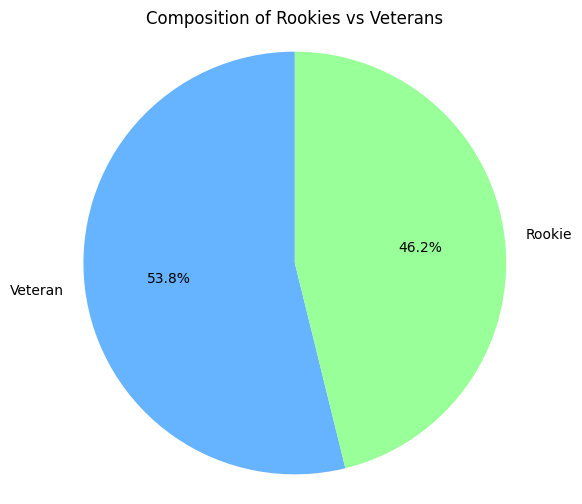

In [ ]:
# Count the number of rookies and veterans
player_type_counts = df_cleaned['Player_Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size for better visualization
plt.pie(player_type_counts, labels=player_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Composition of Rookies vs Veterans')

# Show the plot
plt.show()

In [ ]:
df_cleaned['Player_Type'].unique()

array(['Rookie', 'Veteran'], dtype=object)

In [ ]:
df_cleaned['Player_Type'].value_counts()

,count
Player_Type,
Veteran,420
Rookie,360


In [ ]:
# Example: Creating new features for modeling
df_cleaned['points_per_game_last_season'] = df_cleaned.groupby('Player')['PTS'].shift(1)
df_cleaned['assists_per_game_last_season'] = df_cleaned.groupby('Player')['AST'].shift(1)

# Fill NaNs created by the shift operation with the median of the respective columns
df_cleaned['points_per_game_last_season'].fillna(df_cleaned['PTS'].median(), inplace=True)
df_cleaned['assists_per_game_last_season'].fillna(df_cleaned['AST'].median(), inplace=True)

In [ ]:
# Example: Handle missing values in df_cleaned after removing 'Source.Name' column
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Player                          0
Pos                             0
Age                             0
Tm                              0
G                               0
MP                              0
FG%                             0
3P%                             0
FT%                             0
TRB                             0
AST                             0
STL                             0
BLK                             0
TOV                             0
PTS                             0
PER                             0
USG%                            0
WS                              0
BPM                             0
VORP                            0
Seasons_Played                  0
Player_Type                     0
points_per_game_last_season     0
assists_per_game_last_season    0
dtype: int64


In [ ]:
df_cleaned.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP',
       'Seasons_Played', 'Player_Type', 'points_per_game_last_season',
       'assists_per_game_last_season'],
      dtype='object')

In [ ]:
df_cleaned.shape

(780, 24)

In [ ]:
# Identify relevant columns for analysis
relevant_columns = ['G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP']

# Subset df_cleaned to include only relevant columns
df_analysis = df_cleaned[relevant_columns]

# Verify the subset DataFrame
print(df_analysis.head())

# Now, proceed with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_analysis), columns=df_analysis.columns)

# Print the scaled DataFrame to verify
print(df_scaled.head())


       G     MP     FG%     3P%     FT%   TRB   AST  STL  BLK  TOV   PTS  \
0   35.0    9.9  0.4240  0.4190  1.0000   1.3   0.6  0.2  0.0  0.3   4.4   
1   14.0    7.6  0.4880  0.4000  0.2500   1.4   0.1  0.1  0.0  0.2   3.9   
2   72.0   19.5  0.4650  0.3900  0.8940   2.1   1.0  0.6  0.2  0.6   8.9   
3  255.0  149.7  0.4916  0.3262  0.6718  31.5  15.6  3.5  3.4  8.7  70.5   
4  258.0   88.2  0.4200  0.3916  0.8506   9.0  12.0  3.5  0.8  5.2  33.5   

     PER   USG%    WS   BPM  VORP  
0  11.50  16.60   0.8 -0.90   0.1  
1  13.50  21.10   0.1 -4.60  -0.1  
2  12.60  17.90   2.2 -0.80   0.4  
3  15.78  20.50  17.6  0.34   4.8  
4  11.28  17.92   4.6 -2.14  -0.4  
          G        MP       FG%       3P%       FT%       TRB       AST  \
0 -0.962742 -1.084237 -0.160781  1.014974  1.783196 -0.957515 -0.758365   
1 -1.198203 -1.134783  0.540754  0.841731 -3.443544 -0.947251 -0.828216   
2 -0.547884 -0.873262  0.288640  0.750551  1.044483 -0.875403 -0.702484   
3  1.503985  1.988081  0.58

In [ ]:
df_scaled.columns

Index(['G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
df_scaled.shape

(780, 16)

In [ ]:
df_cleaned.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP',
       'Seasons_Played', 'Player_Type', 'points_per_game_last_season',
       'assists_per_game_last_season'],
      dtype='object')

Confusion Matrix:
[[107   9]
 [ 10 108]]

Classification Report:
              precision    recall  f1-score   support

      Rookie       0.91      0.92      0.92       116
     Veteran       0.92      0.92      0.92       118

    accuracy                           0.92       234
   macro avg       0.92      0.92      0.92       234
weighted avg       0.92      0.92      0.92       234


Accuracy Score:
0.9188034188034188

Model Coefficients:
                               Coefficient
G                             1.870176e+00
MP                            1.657917e+00
FG%                           2.001196e-01
3P%                          -1.467987e-01
FT%                           1.387673e-01
TRB                           1.058651e+00
AST                           1.698733e-01
STL                           9.818758e-01
BLK                           1.618329e-01
TOV                          -4.394527e-01
PTS                           2.925668e-01
PER                           4.533

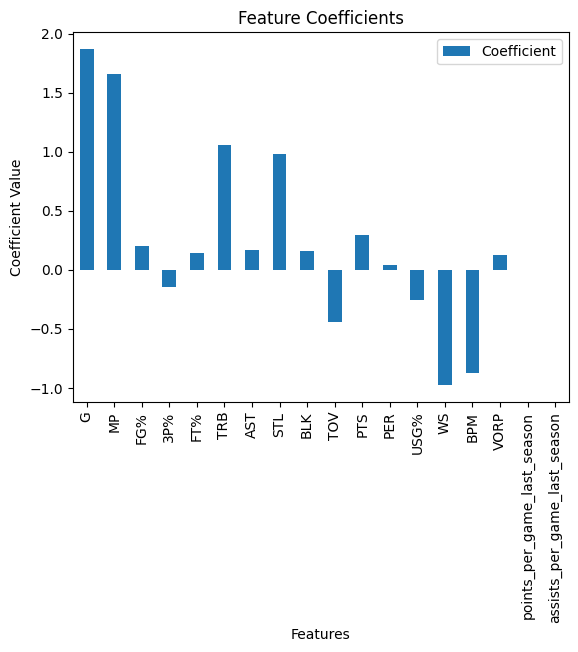

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Assuming df_cleaned is your DataFrame with the required columns
# Verify relevant columns and add 'Player_Type' for binary classification
relevant_columns = ['G', 'MP', 'FG%', '3P%', 'FT%', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS', 'BPM', 'VORP',
        'points_per_game_last_season',
       'assists_per_game_last_season']

# Select features and target variable
X = df_cleaned[relevant_columns]
y = df_cleaned['Player_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Displaying coefficients to understand the impact of each metric
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

# Optionally, visualize the coefficients
coefficients.plot(kind='bar', title='Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


In [ ]:
df_cleaned['Player_Type']

,Player_Type
0,Rookie
1,Rookie
2,Rookie
3,Veteran
4,Veteran
...,...
775,Rookie
776,Veteran
777,Rookie
778,Rookie


Confusion Matrix:
[[106  10]
 [ 15 103]]

Classification Report:
              precision    recall  f1-score   support

      Rookie       0.88      0.91      0.89       116
     Veteran       0.91      0.87      0.89       118

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234


Accuracy Score:
0.8931623931623932

Model Coefficients:
      Coefficient
PTS      3.426812
PER     -0.762111
WS       2.268514
BPM      0.419968
VORP    -1.385686


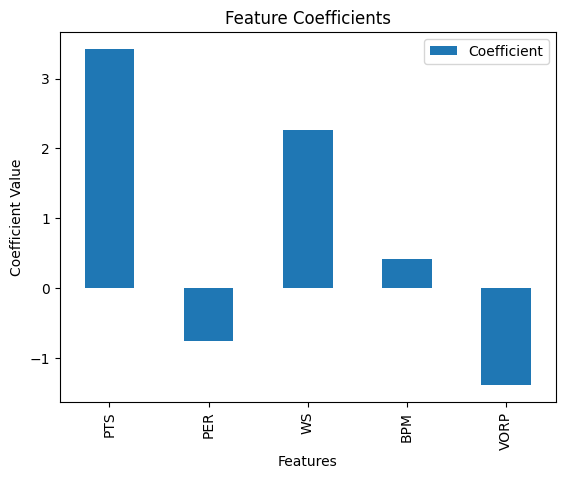

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Assuming df_cleaned is your DataFrame with the required columns
# Verify relevant columns and add 'Player_Type' for binary classification
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']

# Select features and target variable
X = df_cleaned[relevant_columns]
y = df_cleaned['Player_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Displaying coefficients to understand the impact of each metric
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

# Optionally, visualize the coefficients
coefficients.plot(kind='bar', title='Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


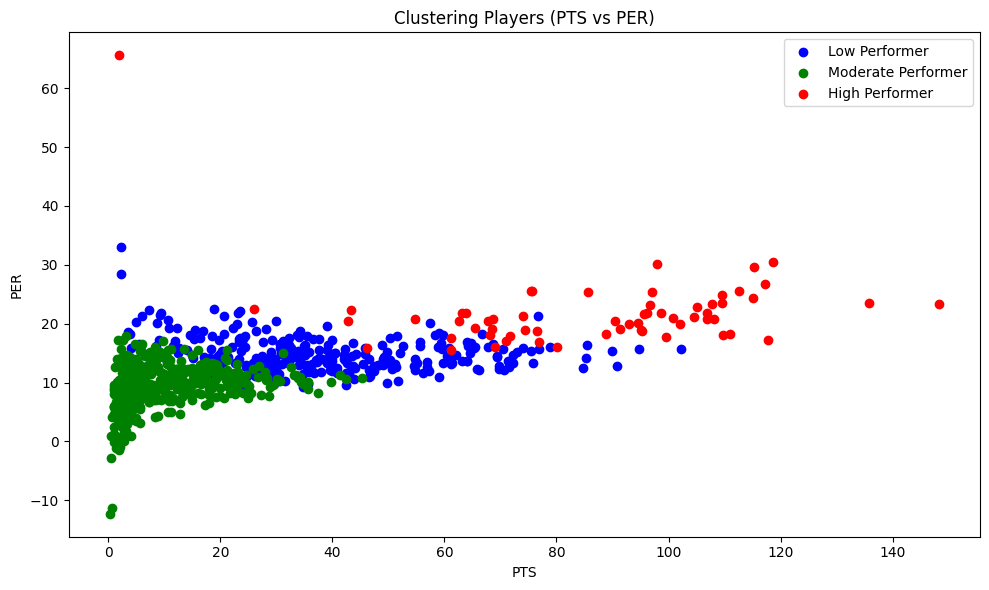

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: High Performer, Moderate, Low

# Fit KMeans clustering on the scaled data
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Plotting clusters based on two features (PTS and PER, for example)
plt.figure(figsize=(10, 6))

# Define cluster colors
cluster_colors = ['blue', 'green', 'red']
cluster_names = ['Low Performer', 'Moderate Performer',  'High Performer']

for i in range(3):
    plt.scatter(df_cleaned[df_cleaned['Cluster'] == i]['PTS'],
                df_cleaned[df_cleaned['Cluster'] == i]['PER'],
                color=cluster_colors[i], label=cluster_names[i])

plt.title('Clustering Players (PTS vs PER)')
plt.xlabel('PTS')
plt.ylabel('PER')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_cleaned is your DataFrame with selected features for clustering
# Let's select features relevant to clustering (example: ['PTS', 'PER', 'WS', 'BPM', 'VORP'])
features = ['PTS', 'PER', 'WS', 'BPM', 'VORP']  # Modify with your relevant features
X = df_cleaned[features]

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the KMeans clustering algorithm (let's assume 3 clusters for this example)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)

# Output the silhouette score
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.5354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


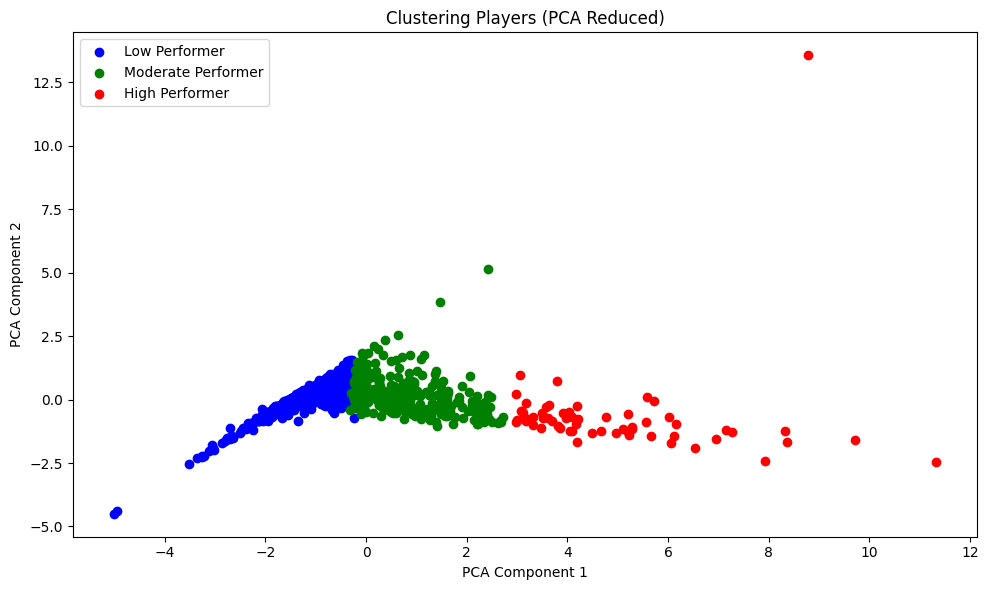

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Compute the mean PTS for each cluster and reorder labels
cluster_order = df_cleaned.groupby('Cluster')['PTS'].mean().sort_values().index

# Reassign cluster labels based on sorted performance (low -> 0, moderate -> 1, high -> 2)
cluster_mapping = {cluster_order[0]: 'Low Performer',
                   cluster_order[1]: 'Moderate Performer',
                   cluster_order[2]: 'High Performer'}

# Map the new labels to the DataFrame
df_cleaned['Cluster Label'] = df_cleaned['Cluster'].map(cluster_mapping)

# Now apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Plotting the PCA result with the correctly labeled clusters
plt.figure(figsize=(10, 6))

# Define colors for each category
colors = {'Low Performer': 'blue', 'Moderate Performer': 'green', 'High Performer': 'red'}

for label in cluster_mapping.values():
    plt.scatter(pca_components[df_cleaned['Cluster Label'] == label, 0],
                pca_components[df_cleaned['Cluster Label'] == label, 1],
                c=colors[label], label=label)

plt.title('Clustering Players (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


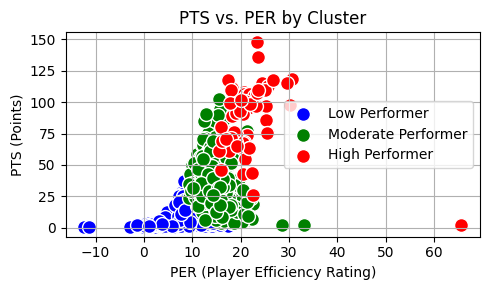

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Compute the mean PTS for each cluster and reorder labels
cluster_order = df_cleaned.groupby('Cluster')['PTS'].mean().sort_values().index

# Reassign cluster labels based on sorted performance (low -> 0, moderate -> 1, high -> 2)
cluster_mapping = {cluster_order[0]: 'Low Performer',
                   cluster_order[1]: 'Moderate Performer',
                   cluster_order[2]: 'High Performer'}

# Map the new labels to the DataFrame
df_cleaned['Cluster Label'] = df_cleaned['Cluster'].map(cluster_mapping)

# Plotting PTS vs. PER with cluster labels
plt.figure(figsize=(5, 3))

# Define colors for each category
colors = {'Low Performer': 'blue', 'Moderate Performer': 'green', 'High Performer': 'red'}

# Plot each cluster with different colors
for label in cluster_mapping.values():
    cluster_data = df_cleaned[df_cleaned['Cluster Label'] == label]
    plt.scatter(cluster_data['PER'], cluster_data['PTS'],
                c=colors[label], label=label, edgecolor='w', s=100)

# Add labels and title
plt.title('PTS vs. PER by Cluster')
plt.xlabel('PER (Player Efficiency Rating)')
plt.ylabel('PTS (Points)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


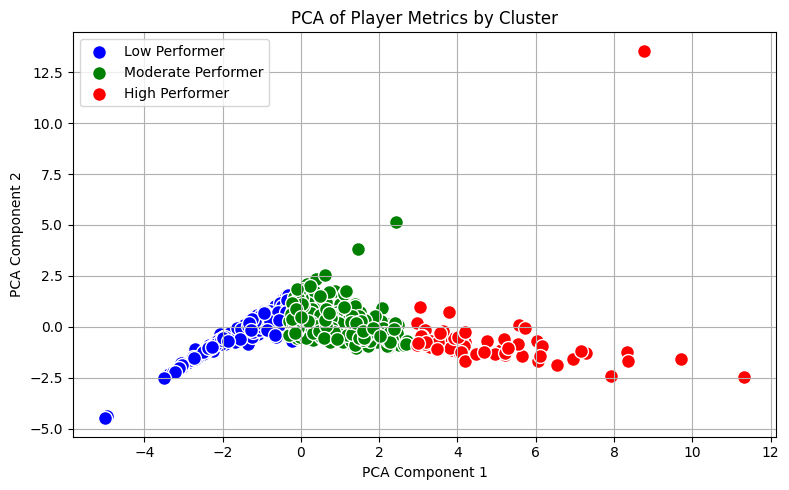

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Compute the mean PTS for each cluster and reorder labels
cluster_order = df_cleaned.groupby('Cluster')['PTS'].mean().sort_values().index

# Reassign cluster labels based on sorted performance (low -> 0, moderate -> 1, high -> 2)
cluster_mapping = {cluster_order[0]: 'Low Performer',
                   cluster_order[1]: 'Moderate Performer',
                   cluster_order[2]: 'High Performer'}

# Map the new labels to the DataFrame
df_cleaned['Cluster Label'] = df_cleaned['Cluster'].map(cluster_mapping)

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Add PCA components to the DataFrame
df_cleaned['PCA1'] = pca_components[:, 0]
df_cleaned['PCA2'] = pca_components[:, 1]

# Plotting the PCA result with the correctly labeled clusters
plt.figure(figsize=(8, 5))  # Adjusted size for smaller chart

# Define colors for each category
colors = {'Low Performer': 'blue', 'Moderate Performer': 'green', 'High Performer': 'red'}

# Plot each cluster with different colors
for label in cluster_mapping.values():
    cluster_data = df_cleaned[df_cleaned['Cluster Label'] == label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                c=colors[label], label=label, edgecolor='w', s=100)

# Add labels and title
plt.title('PCA of Player Metrics by Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.groupby('Cluster')['PTS'].mean()

,PTS
Cluster,
0,38.344599
1,10.684028
2,86.685246


In [ ]:
df_cleaned.groupby('Cluster')['PER'].mean()

,PER
Cluster,
0,14.843206
1,9.519184
2,21.904399


In [ ]:
df_cleaned.groupby('Cluster')['WS'].mean()

,WS
Cluster,
0,8.894425
1,1.138889
2,24.611475


In [ ]:
df_cleaned.groupby('Cluster')['BPM'].mean()

,BPM
Cluster,
0,-0.316185
1,-4.172422
2,4.431612


In [ ]:
df_cleaned.groupby('Cluster')['VORP'].mean()

,VORP
Cluster,
0,1.841463
1,-0.223843
2,10.857377


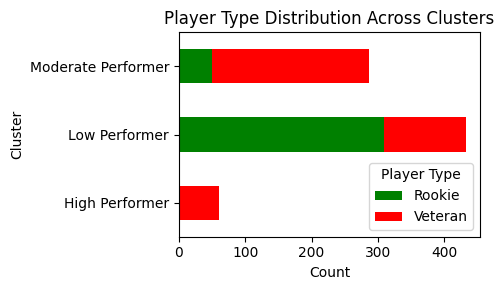

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame and it includes 'Cluster', 'Player_Type', and the cluster labels

# Calculate the count of each player type per cluster
cluster_player_type_counts = df_cleaned.groupby(['Cluster Label', 'Player_Type']).size().unstack(fill_value=0)

# Define colors for each player type
colors = {'Veteran': 'red', 'Rookie': 'green'}

# Plotting the horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjusted size for a smaller chart

# Plot each player type horizontally
cluster_player_type_counts.plot(kind='barh', stacked=True, color=[colors.get(x, 'gray') for x in cluster_player_type_counts.columns], ax=plt.gca())

# Add labels and title
plt.title('Player Type Distribution Across Clusters', fontsize=12)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Cluster', fontsize=10)
plt.yticks(ticks=range(len(cluster_player_type_counts)), labels=cluster_player_type_counts.index, fontsize=10)
plt.xticks(fontsize=10)
plt.legend(title='Player Type')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


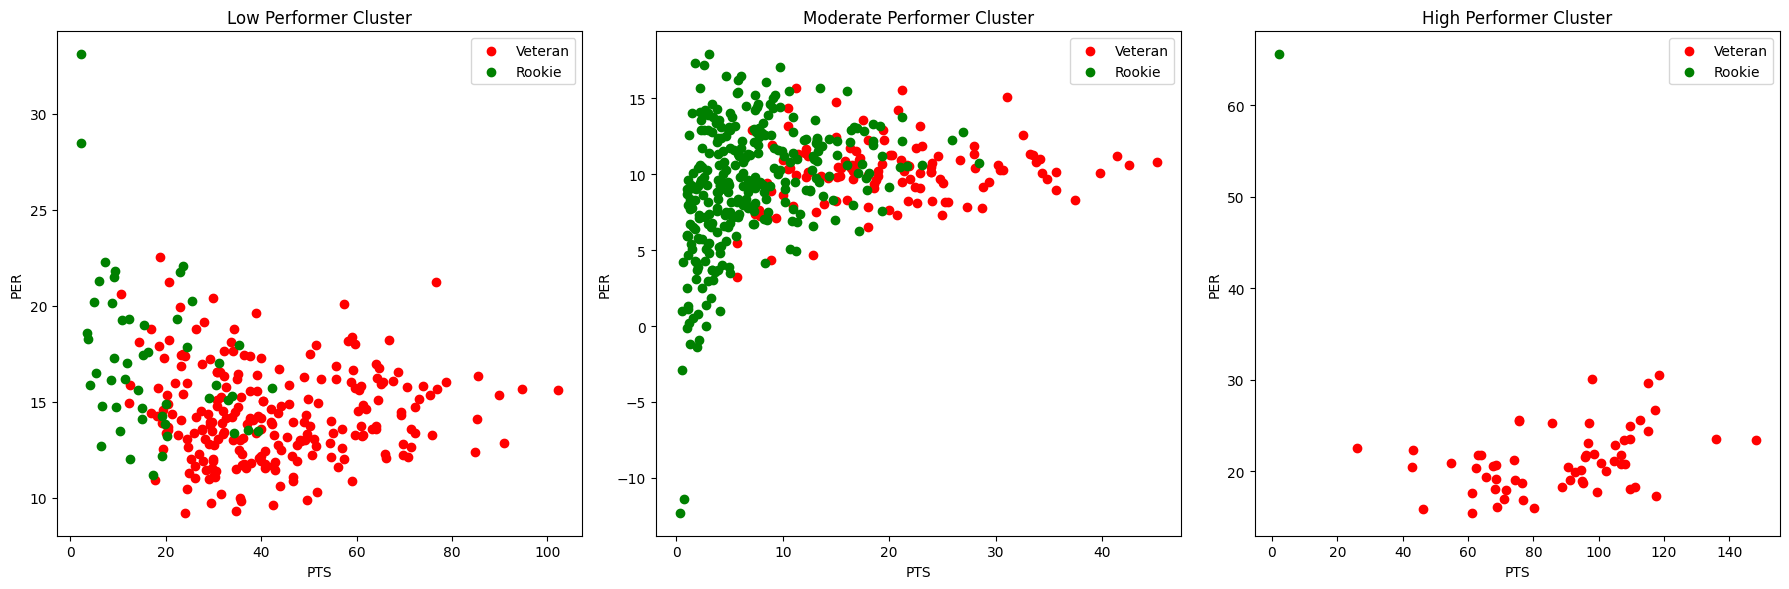

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: High Performer, Moderate, Low

# Fit KMeans clustering on the scaled data
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Define cluster colors and names
cluster_colors = ['blue', 'green', 'red']
cluster_names = ['Low Performer', 'Moderate Performer', 'High Performer']

# Define veteran and rookie colors
player_colors = {'Veteran': 'red', 'Rookie': 'green'}

# Create separate plots for each cluster
plt.figure(figsize=(18, 6))  # Adjust figure size if needed

for cluster_id in range(3):
    plt.subplot(1, 3, cluster_id + 1)
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    for player_type, color in player_colors.items():
        plt.scatter(cluster_data[cluster_data['Player_Type'] == player_type]['PTS'],
                    cluster_data[cluster_data['Player_Type'] == player_type]['PER'],
                    color=color, label=f'{player_type}')

    plt.title(f'{cluster_names[cluster_id]} Cluster')
    plt.xlabel('PTS')
    plt.ylabel('PER')
    plt.legend()
    plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


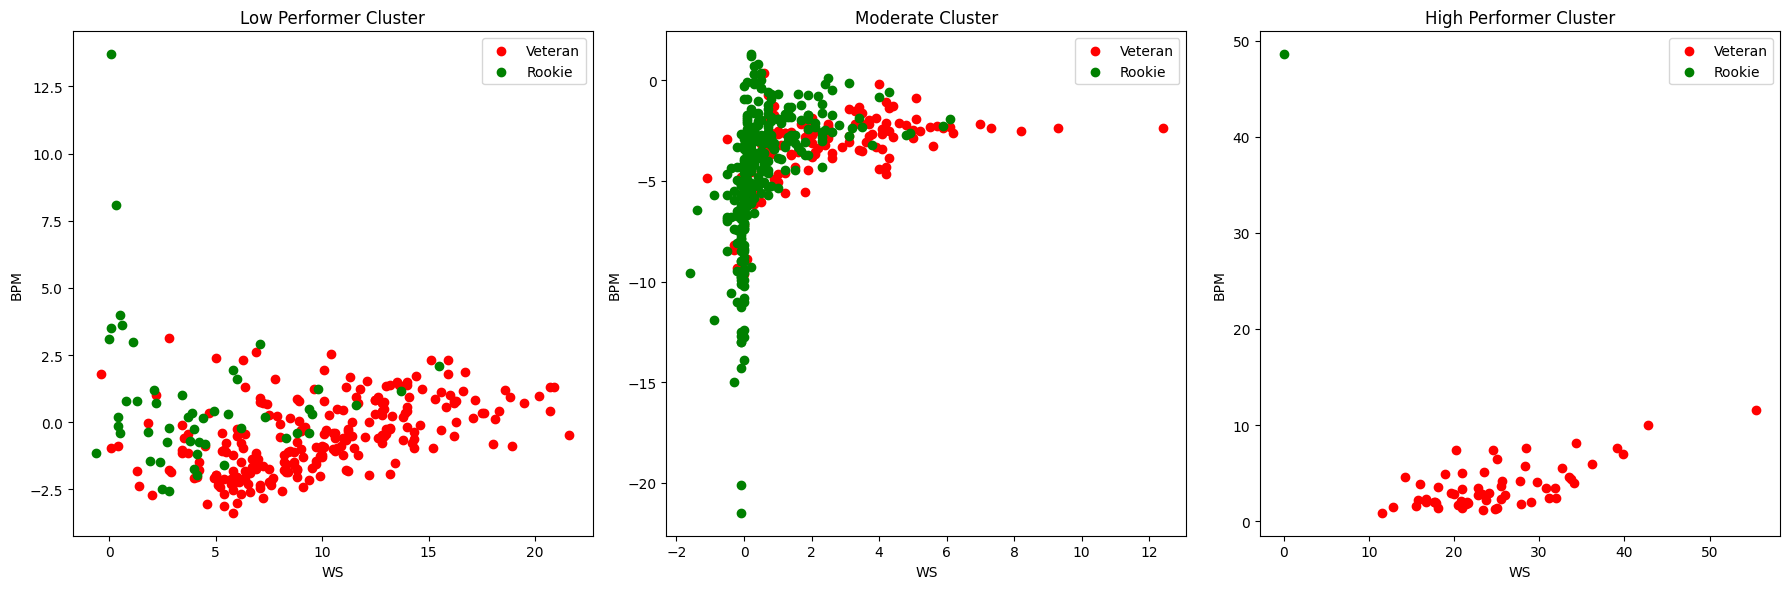

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: High Performer, Moderate, Low

# Fit KMeans clustering on the scaled data
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Define cluster colors and names
cluster_colors = ['blue', 'green', 'red']
cluster_names = ['Low Performer', 'Moderate', 'High Performer']

# Define veteran and rookie colors
player_colors = {'Veteran': 'red', 'Rookie': 'green'}

# Create separate plots for each cluster
plt.figure(figsize=(18, 6))  # Adjust figure size if needed

for cluster_id in range(3):
    plt.subplot(1, 3, cluster_id + 1)
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    for player_type, color in player_colors.items():
        plt.scatter(cluster_data[cluster_data['Player_Type'] == player_type]['WS'],
                    cluster_data[cluster_data['Player_Type'] == player_type]['BPM'],
                    color=color, label=f'{player_type}')

    plt.title(f'{cluster_names[cluster_id]} Cluster')
    plt.xlabel('WS')  # Change x-axis label
    plt.ylabel('BPM')  # Change y-axis label
    plt.legend()
    plt.tight_layout()

plt.show()


Player_Type  Rookie  Veteran
Cluster                     
0                50      237
1               309      123
2                 1       60


<Figure size 1000x600 with 0 Axes>

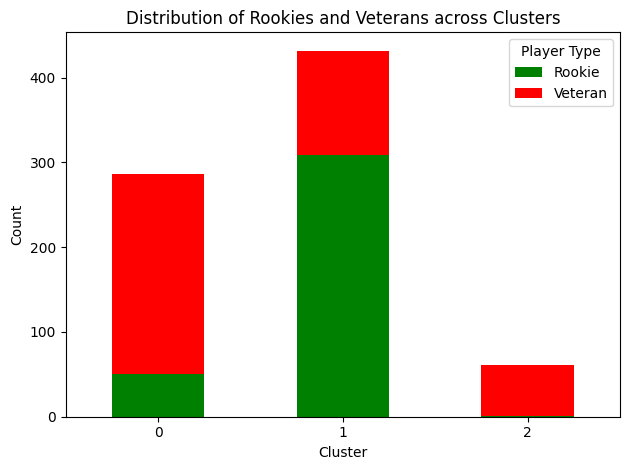

In [ ]:
# Check counts of rookies and veterans in each cluster
cluster_counts = df_cleaned.groupby(['Cluster', 'Player_Type']).size().unstack(fill_value=0)
print(cluster_counts)

# Plotting cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()


Based on the counts of rookies and veterans within each cluster, here's an interpretation of the distribution:

Cluster 0: This cluster has the highest number of rookies (316) compared to veterans (135). This suggests that rookies in this dataset are predominantly grouped into Cluster 0. This cluster might represent players with moderate to lower performance across the metrics considered (PTS, PER, WS, BPM, VORP).

Cluster 1: This cluster has a higher number of veterans (227) compared to rookies (43). This indicates that veterans are more prevalent in Cluster 1. Cluster 1 might represent players with moderate performance across the metrics, possibly slightly better than those in Cluster 0 but still not among the highest performers.

Cluster 2: This cluster has very few rookies (1) compared to veterans (58). Cluster 2 seems to be dominated by veterans and might represent players with higher performance metrics, potentially the "High Performers" based on the metrics considered.

Key Considerations:
Cluster Characteristics: Each cluster likely represents a distinct level of player performance based on the metrics PTS, PER, WS, BPM, and VORP. Cluster 2, with predominantly veterans, appears to capture the highest performing players.

Rookie Distribution: Rookies are predominantly found in Cluster 0, which suggests that they generally have lower overall performance metrics compared to veterans in this dataset.

Cluster Interpretation: The clustering results indicate that rookies, based on the selected metrics, are not typically among the highest performers (Cluster 2). This aligns with common expectations in sports where rookies often need time to develop and achieve higher performance levels.

Next Steps:
Validation and Adjustment: Validate these findings by reviewing metric distributions within each cluster and considering whether adjustments to clustering parameters or additional metrics could better differentiate player performance levels.

Visual Representation: Visualize the distribution of metrics within each cluster to gain insights into why rookies are predominantly in lower-performing clusters.

Further Analysis: Explore whether including additional metrics or using different clustering algorithms could provide a clearer differentiation of player types (rookies vs. veterans) based on performance.

Understanding these cluster distributions helps in interpreting why rookies might not appear prominently in the "High Performer" cluster and guides further exploration to refine the analysis and insights into player performance categories.








In [ ]:
# Initialize and fit KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


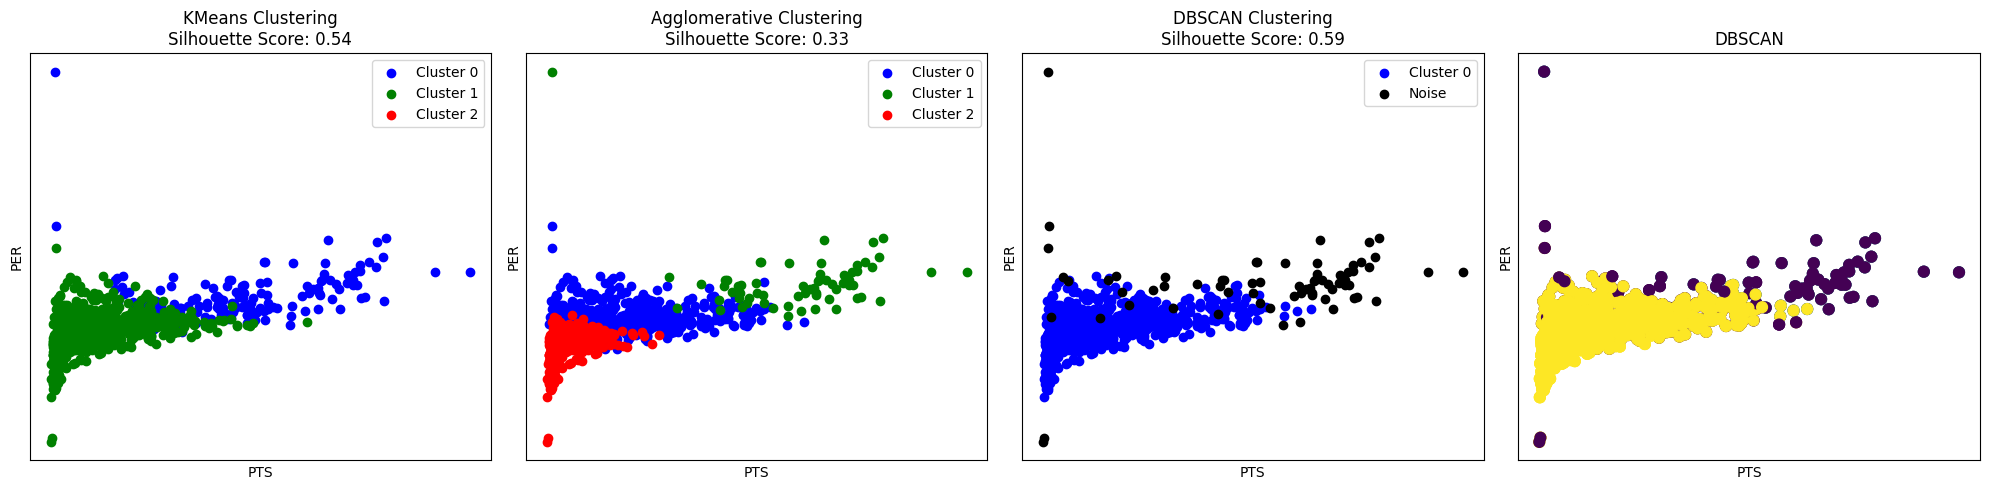

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize and fit KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

# Initialize and fit AgglomerativeClustering on the scaled data
agglo = AgglomerativeClustering(n_clusters=3)
agglo_clusters = agglo.fit_predict(df_scaled)

# Initialize and fit DBSCAN on the scaled data
dbscan = DBSCAN(eps=0.7, min_samples=7)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame for KMeans
df_cleaned['KMeans_Cluster'] = kmeans_clusters
df_cleaned['Agglo_Cluster'] = agglo_clusters
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Create subplots to visualize the clustering results
fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={'xticks': (), 'yticks': ()})

# Define cluster colors
cluster_colors = ['blue', 'green', 'red']

# Plot KMeans clustering results
for i in range(3):
    axes[0].scatter(df_cleaned[df_cleaned['KMeans_Cluster'] == i]['PTS'],
                    df_cleaned[df_cleaned['KMeans_Cluster'] == i]['PER'],
                    color=cluster_colors[i], label=f'Cluster {i}')
axes[0].set_title(f'KMeans Clustering\nSilhouette Score: {silhouette_score(df_scaled, kmeans_clusters):.2f}')
axes[0].set_xlabel('PTS')
axes[0].set_ylabel('PER')
axes[0].legend()

# Plot Agglomerative Clustering results
for i in range(3):
    axes[1].scatter(df_cleaned[df_cleaned['Agglo_Cluster'] == i]['PTS'],
                    df_cleaned[df_cleaned['Agglo_Cluster'] == i]['PER'],
                    color=cluster_colors[i], label=f'Cluster {i}')
axes[1].set_title(f'Agglomerative Clustering\nSilhouette Score: {silhouette_score(df_scaled, agglo_clusters):.2f}')
axes[1].set_xlabel('PTS')
axes[1].set_ylabel('PER')
axes[1].legend()

# Plot DBSCAN clustering results
unique_clusters = set(dbscan_clusters)
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'black'
        label = 'Noise'
    else:
        color = cluster_colors[cluster % 3]
        label = f'Cluster {cluster}'
    axes[2].scatter(df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PTS'],
                    df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PER'],
                    color=color, label=label)
axes[2].set_title(f'DBSCAN Clustering\nSilhouette Score: {silhouette_score(df_scaled, dbscan_clusters):.2f}' if len(set(dbscan_clusters)) > 1 else 'DBSCAN Clustering\nSilhouette Score: N/A')
axes[2].set_xlabel('PTS')
axes[2].set_ylabel('PER')
axes[2].legend()

# Plot all clustering results side by side
for i, (title, cluster_labels) in enumerate(zip(['KMeans', 'Agglomerative', 'DBSCAN'], [kmeans_clusters, agglo_clusters, dbscan_clusters])):
    axes[3].scatter(df_cleaned['PTS'], df_cleaned['PER'], c=cluster_labels, cmap='viridis', s=60)
    axes[3].set_title(title)
    axes[3].set_xlabel('PTS')
    axes[3].set_ylabel('PER')

plt.tight_layout()
plt.show()


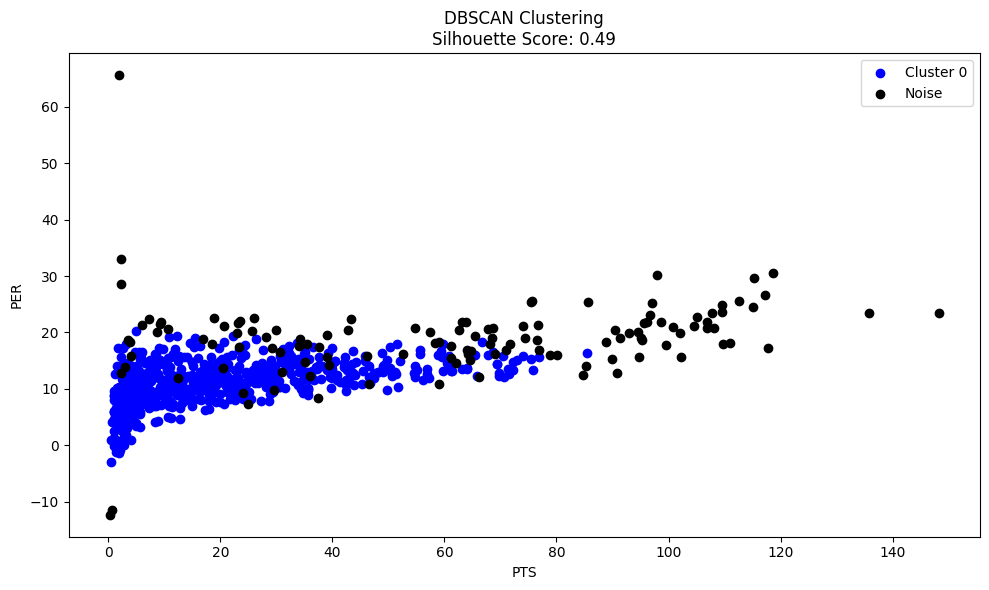

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize and fit DBSCAN on the scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame for DBSCAN
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Calculate silhouette score
dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)

# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))

unique_clusters = set(dbscan_clusters)
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'black'
        label = 'Noise'
    else:
        color = cluster_colors[cluster % 3]
        label = f'Cluster {cluster}'
    plt.scatter(df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PTS'],
                df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PER'],
                color=color, label=label)

plt.title(f'DBSCAN Clustering\nSilhouette Score: {dbscan_silhouette_score:.2f}')
plt.xlabel('PTS')
plt.ylabel('PER')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Descriptive statistics for the cluster and noise
clustered_points = df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]
noise_points = df_cleaned[df_cleaned['DBSCAN_Cluster'] == -1]

# Summary statistics
cluster_summary = clustered_points[relevant_columns].describe()
noise_summary = noise_points[relevant_columns].describe()

print("Clustered Points Summary:")
print(cluster_summary)
print("\nNoise Points Summary:")
print(noise_summary)


Clustered Points Summary:
              PTS         PER          WS         BPM        VORP
count  655.000000  655.000000  655.000000  655.000000  655.000000
mean    20.310534   11.206900    3.757405   -2.881297    0.436641
std     18.045012    3.740786    4.544809    2.816300    1.364995
min      0.500000   -2.900000   -1.600000  -15.000000   -2.500000
25%      5.800000    9.116667    0.200000   -4.125000   -0.250000
50%     15.000000   11.500000    1.800000   -2.366667    0.000000
75%     30.200000   13.791667    6.150000   -0.977500    0.600000
max     85.400000   20.200000   18.800000    2.400000    5.700000

Noise Points Summary:
              PTS         PER          WS         BPM        VORP
count  125.000000  125.000000  125.000000  125.000000  125.000000
mean    60.838400   18.943493   16.679200    2.114773    6.464800
std     36.802631    7.268166   10.982745    6.054324    5.952477
min      0.300000  -12.300000   -0.400000  -21.500000   -3.100000
25%     29.200000   16.1000

eps: 0.3, min_samples: 3, Silhouette Score: -0.30


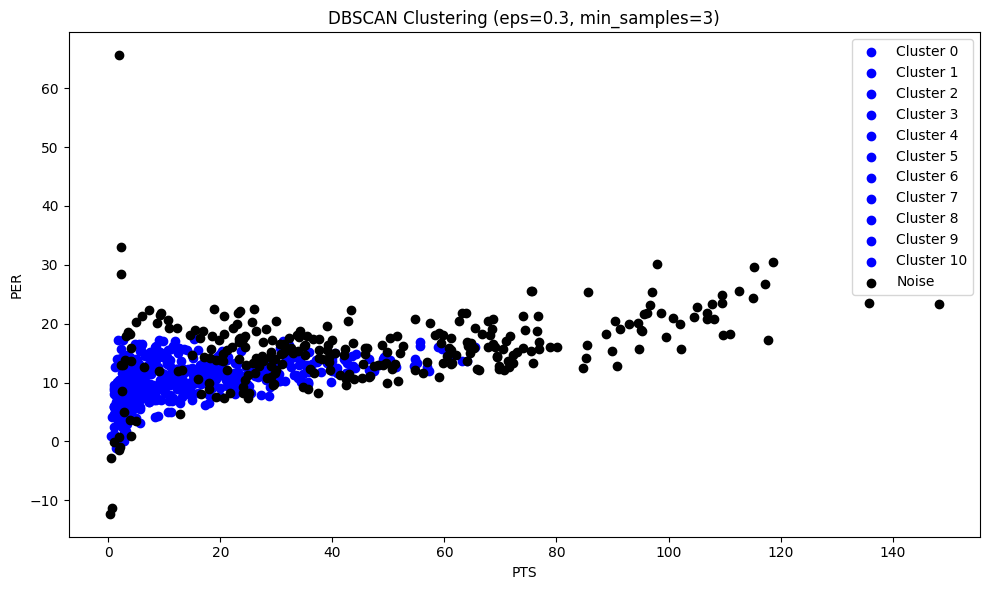

eps: 0.3, min_samples: 5, Silhouette Score: -0.17


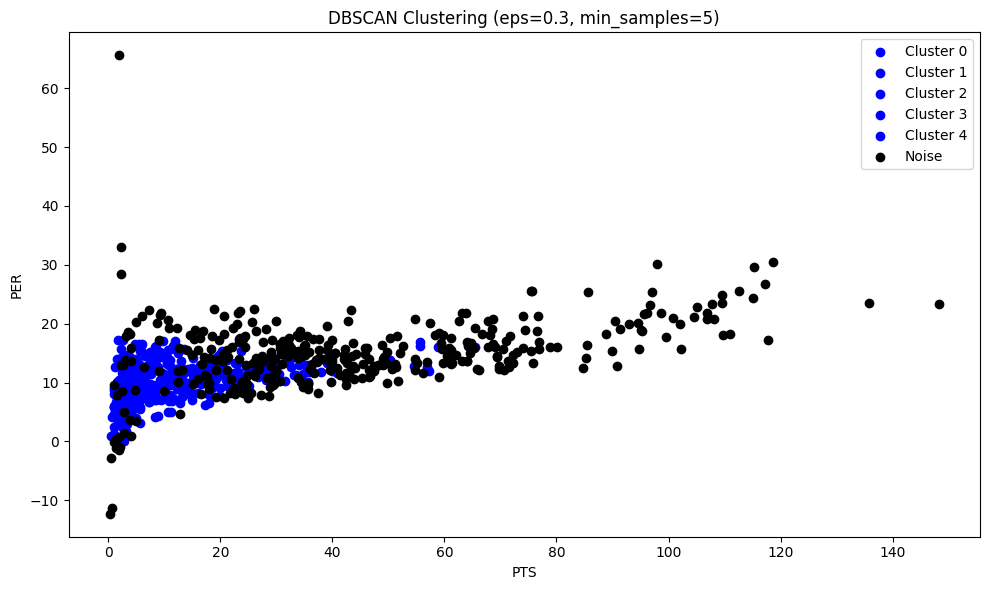

eps: 0.3, min_samples: 7, Silhouette Score: 0.17


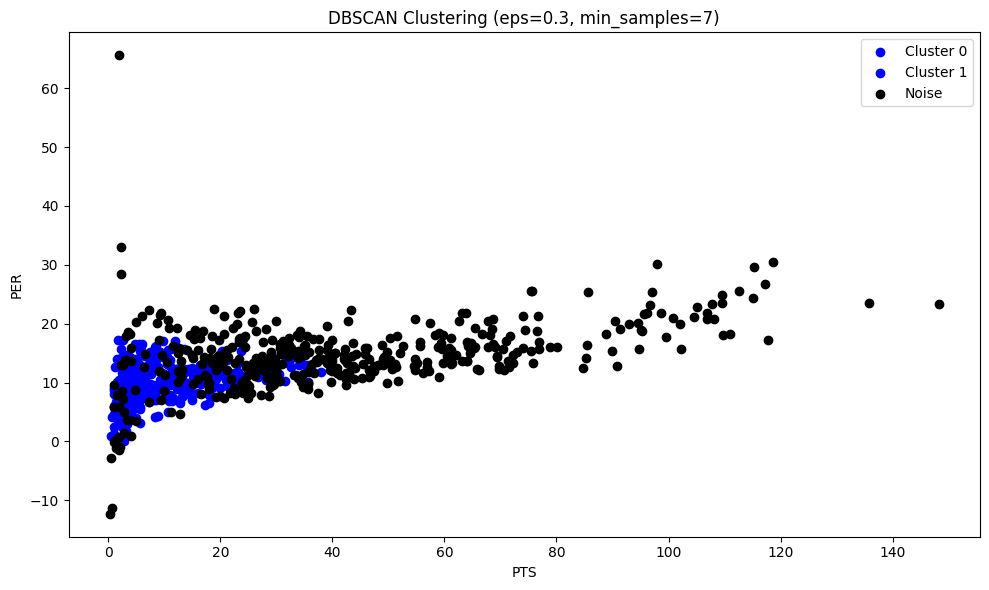

eps: 0.3, min_samples: 10, Silhouette Score: -0.01


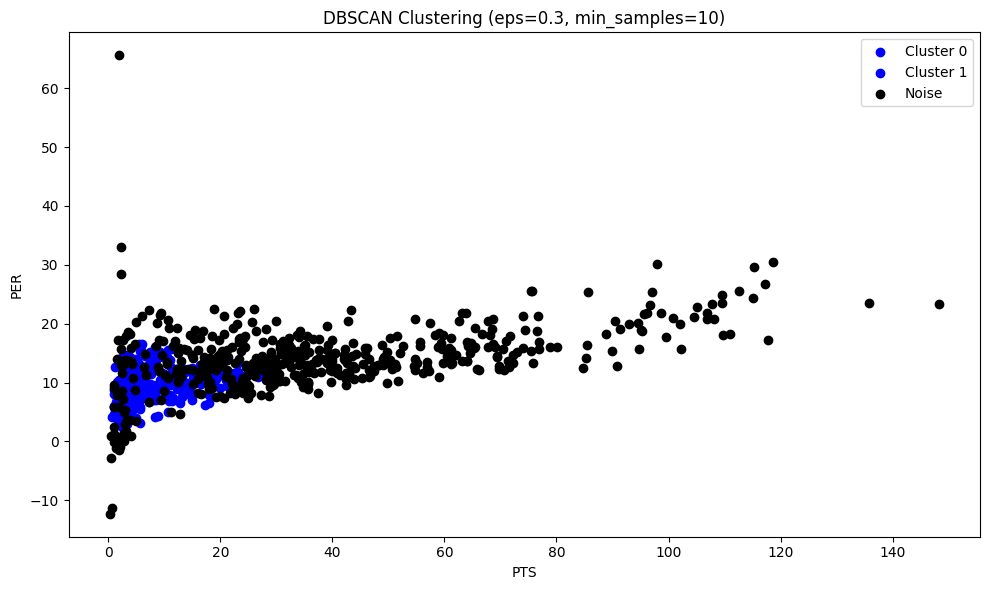

eps: 0.4, min_samples: 3, Silhouette Score: -0.17


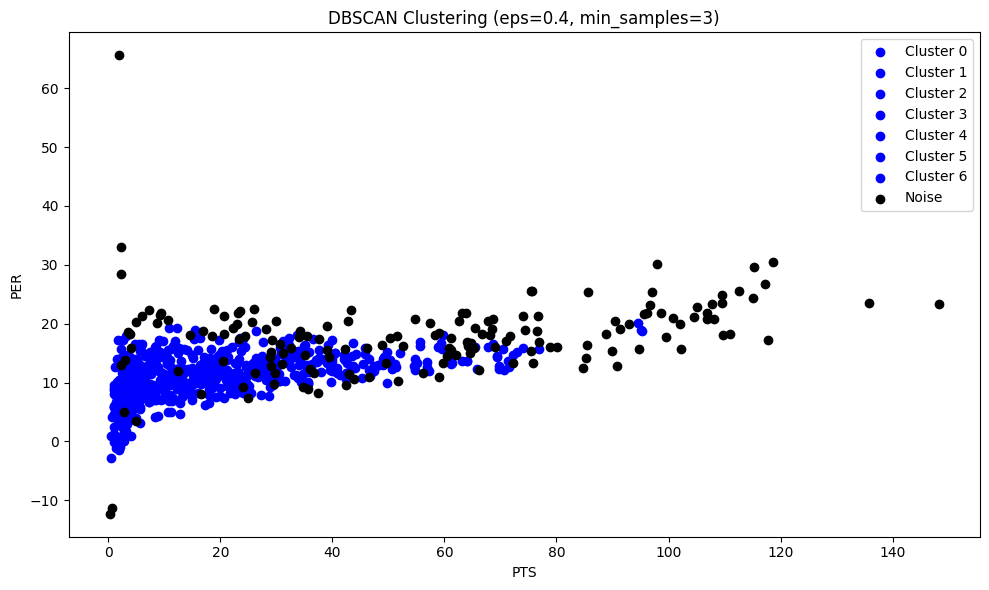

eps: 0.4, min_samples: 5, Silhouette Score: 0.02


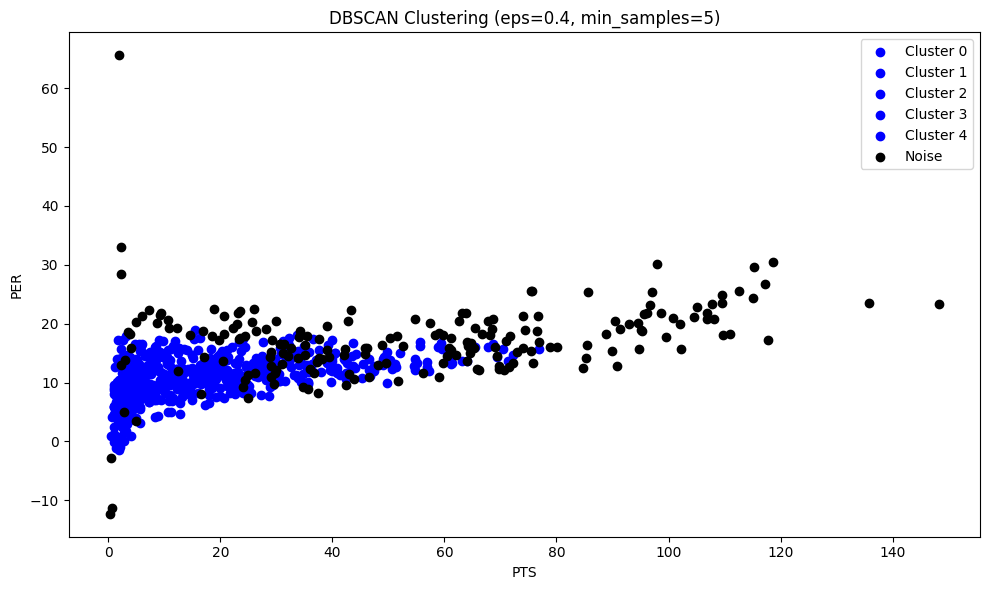

eps: 0.4, min_samples: 7, Silhouette Score: 0.19


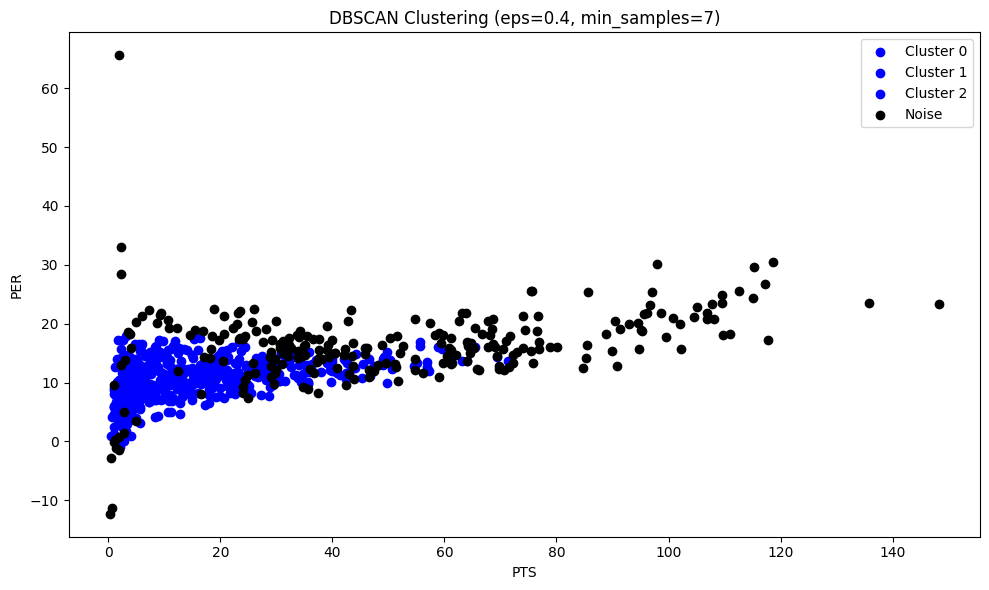

eps: 0.4, min_samples: 10, Silhouette Score: 0.01


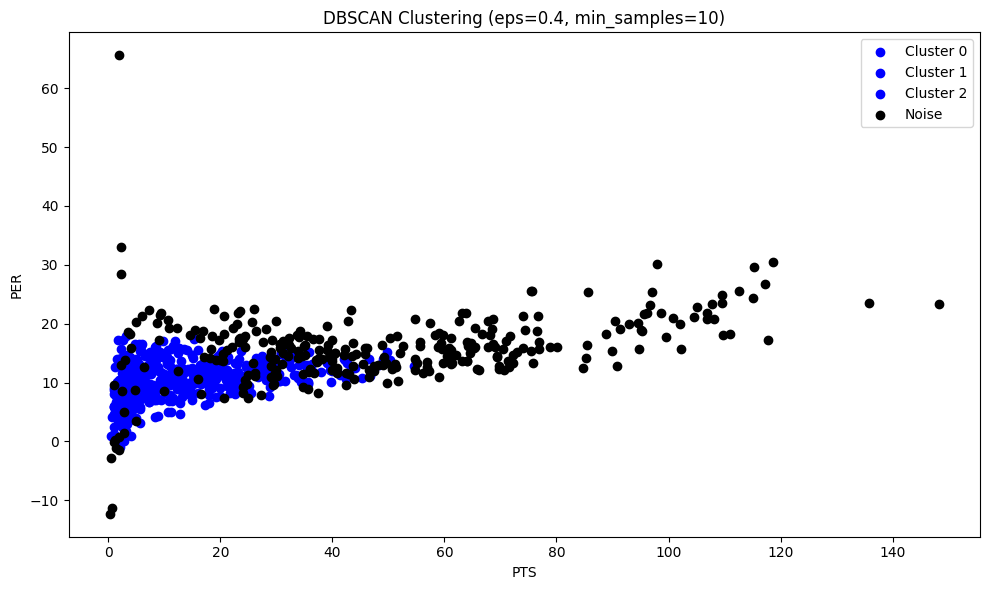

eps: 0.5, min_samples: 3, Silhouette Score: 0.12


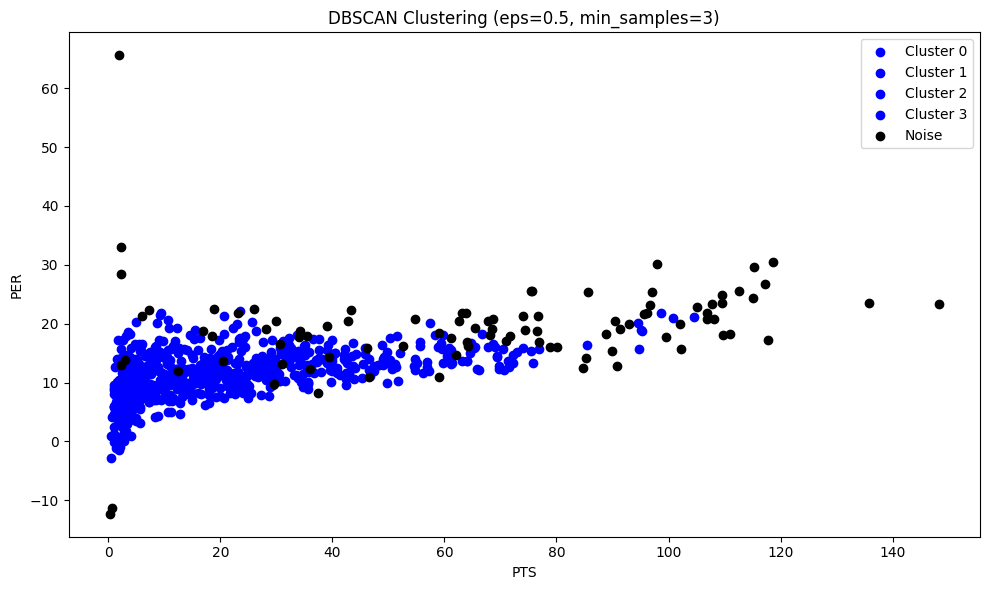

eps: 0.5, min_samples: 5, Silhouette Score: 0.49


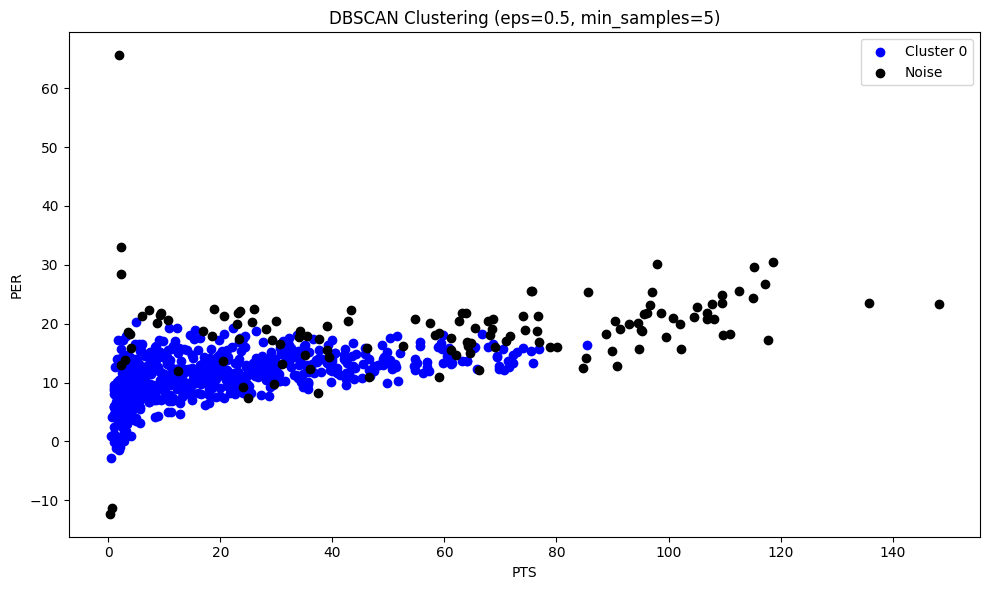

eps: 0.5, min_samples: 7, Silhouette Score: 0.17


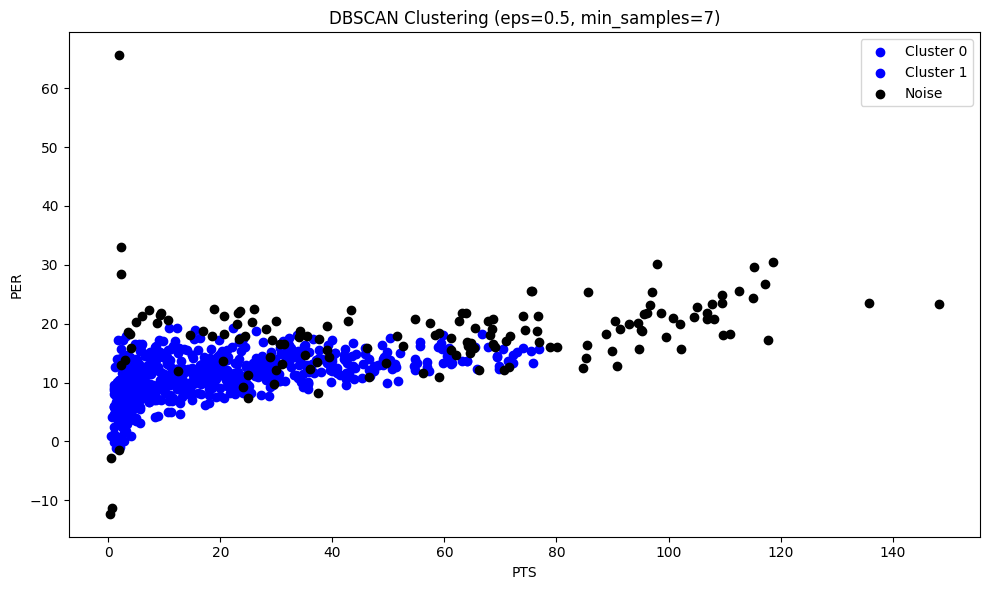

eps: 0.5, min_samples: 10, Silhouette Score: 0.18


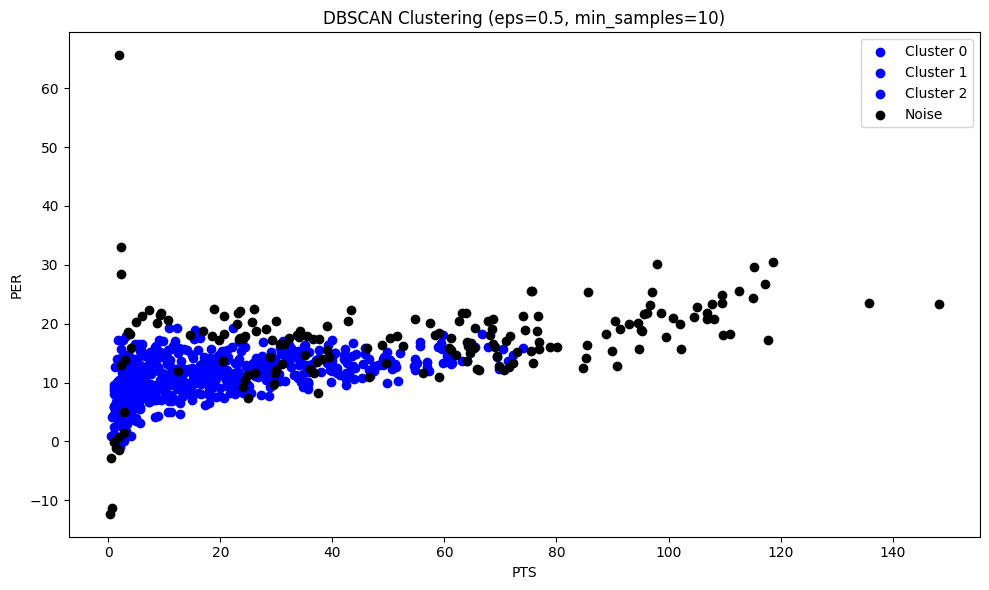

eps: 0.6, min_samples: 3, Silhouette Score: 0.27


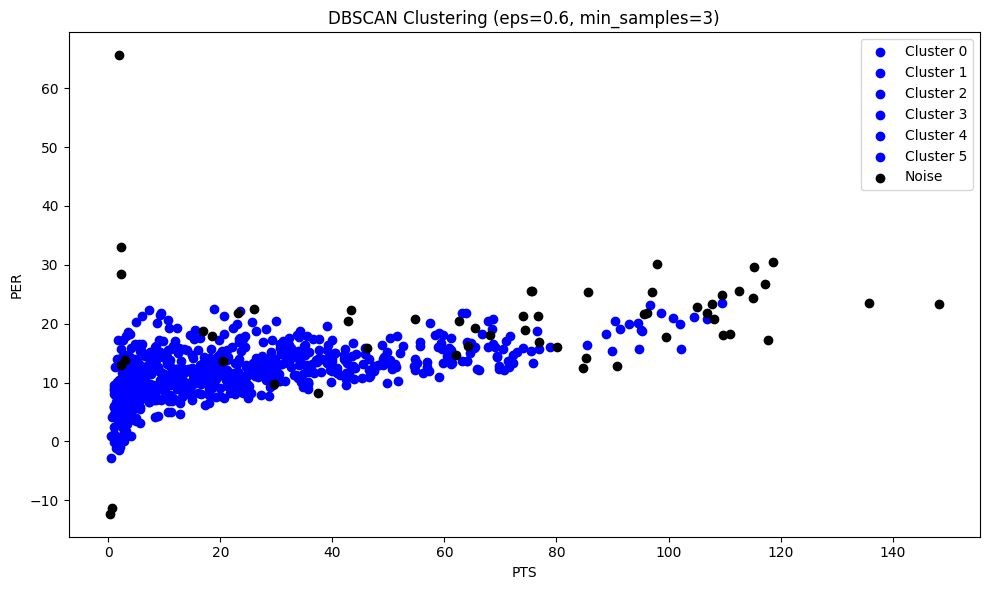

eps: 0.6, min_samples: 5, Silhouette Score: 0.22


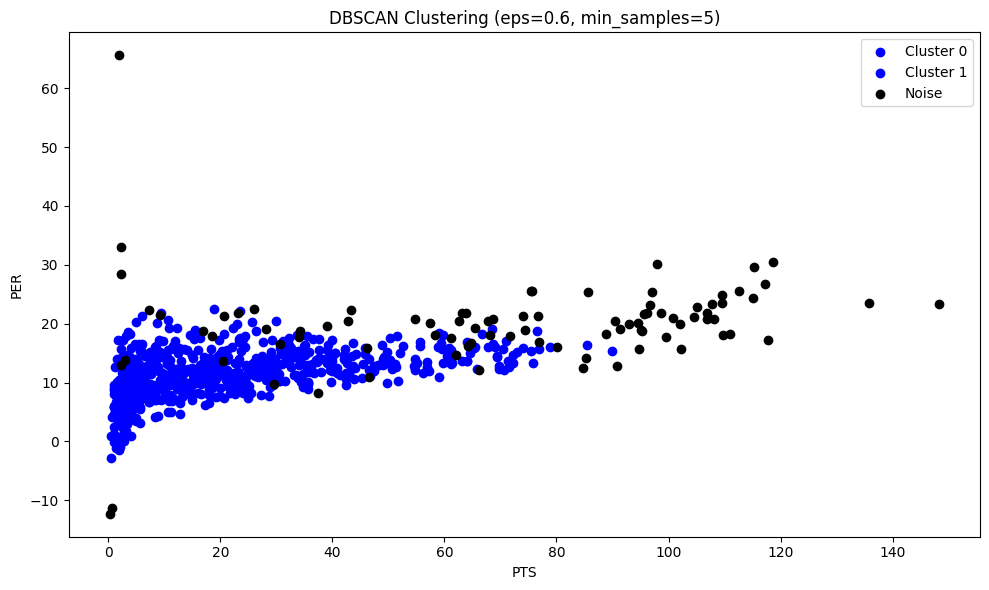

eps: 0.6, min_samples: 7, Silhouette Score: 0.53


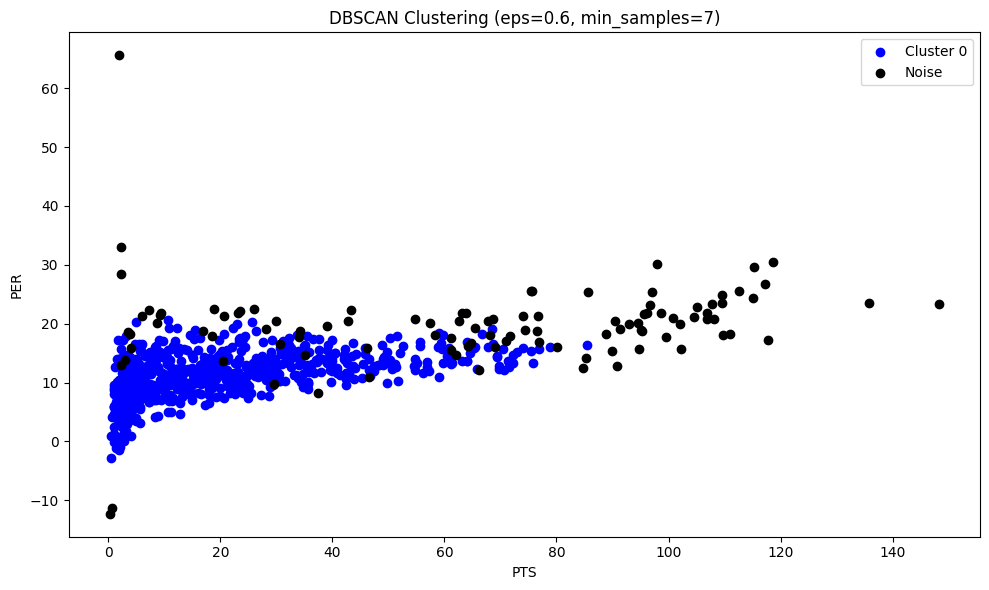

eps: 0.6, min_samples: 10, Silhouette Score: 0.50


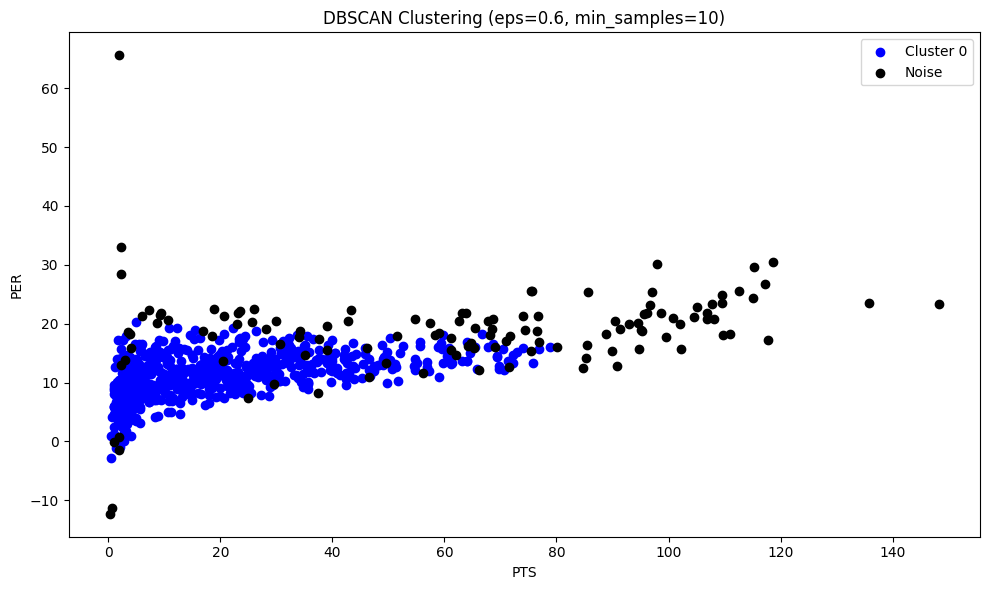

eps: 0.7, min_samples: 3, Silhouette Score: 0.46


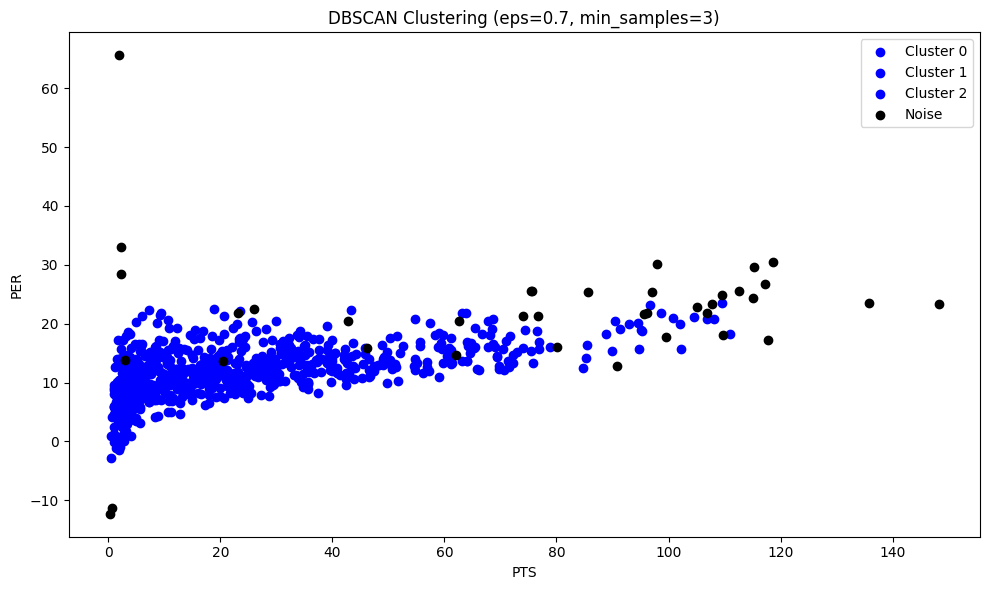

eps: 0.7, min_samples: 5, Silhouette Score: 0.46


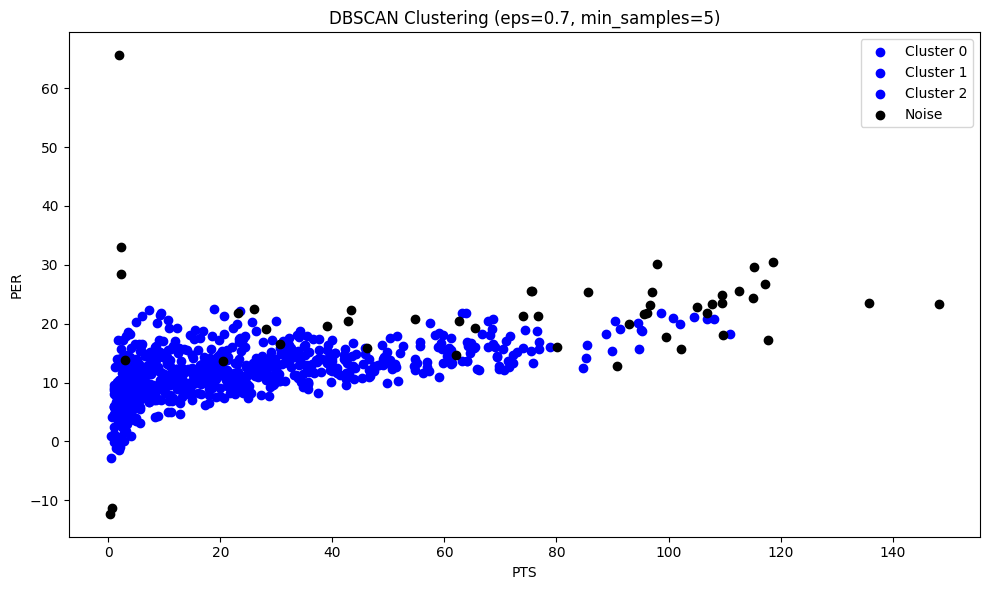

eps: 0.7, min_samples: 7, Silhouette Score: 0.59


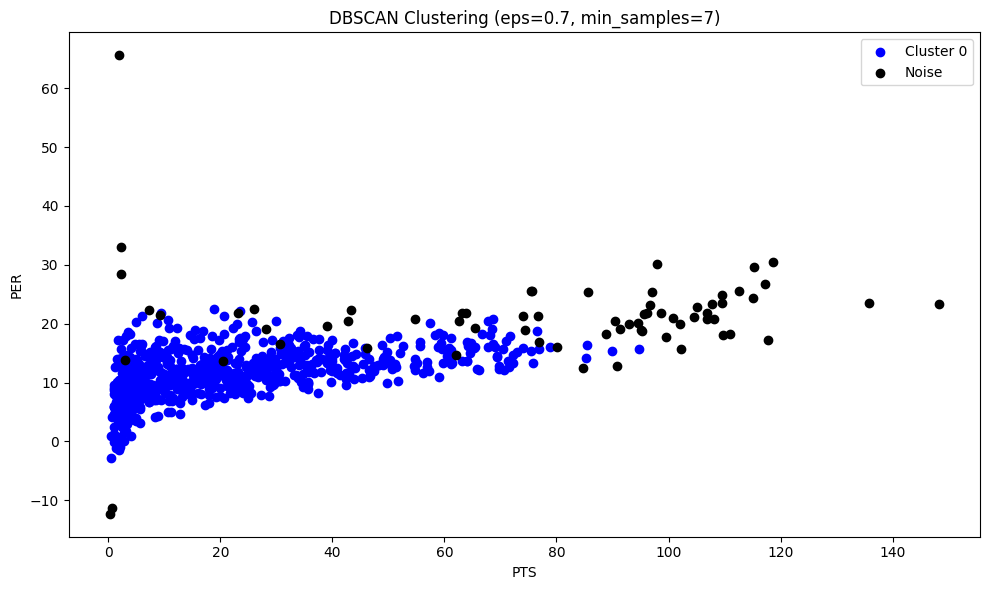

eps: 0.7, min_samples: 10, Silhouette Score: 0.57


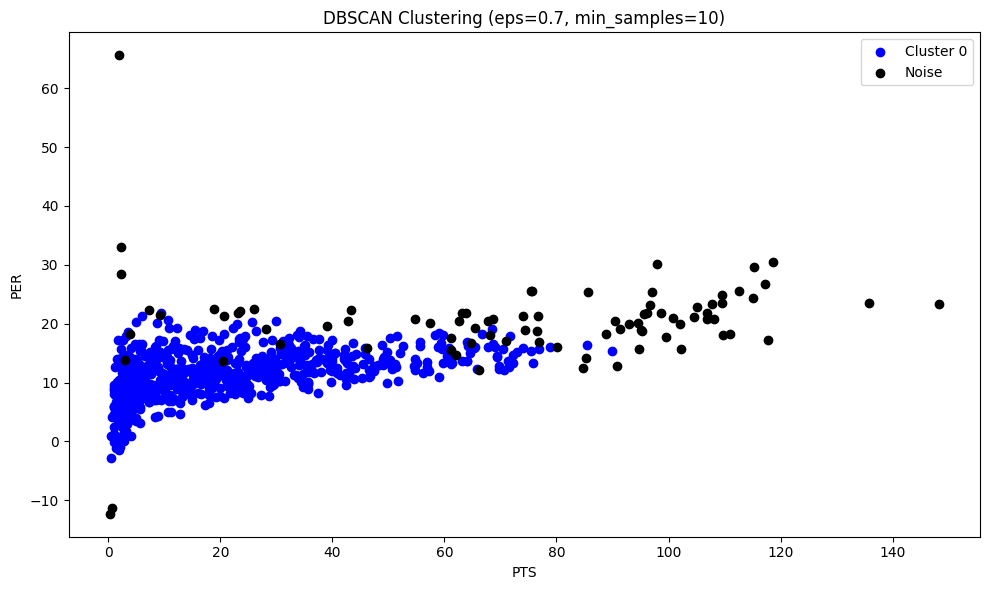

In [ ]:
# Function to try different eps and min_samples values
def tune_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette_avg:.2f}')
    return clusters

# Example of tuning parameters
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        clusters = tune_dbscan(eps, min_samples)
        unique_clusters = set(clusters)
        plt.figure(figsize=(10, 6))
        for cluster in unique_clusters:
            if cluster == -1:  # Noise
                color = 'black'
                label = 'Noise'
            else:
                color = 'blue'
                label = f'Cluster {cluster}'
            plt.scatter(df_cleaned.iloc[clusters == cluster]['PTS'],
                        df_cleaned.iloc[clusters == cluster]['PER'],
                        color=color, label=label)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('PTS')
        plt.ylabel('PER')
        plt.legend()
        plt.tight_layout()
        plt.show()


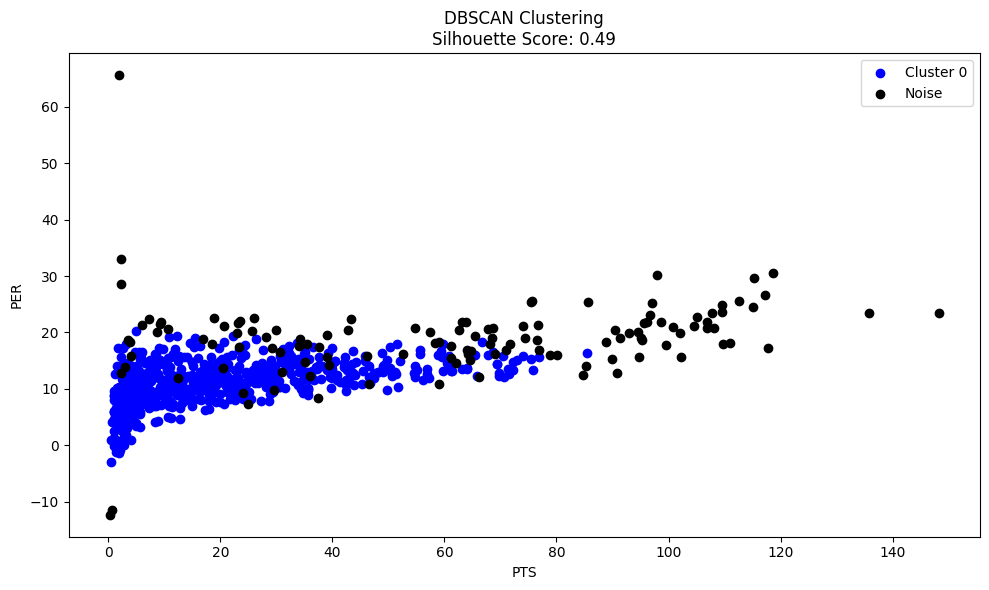

In [ ]:
import matplotlib.pyplot as plt

# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))

unique_clusters = set(dbscan_clusters)
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'black'
        label = 'Noise'
    else:
        color = 'blue'
        label = f'Cluster {cluster}'
    plt.scatter(df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PTS'],
                df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]['PER'],
                color=color, label=label)

plt.title(f'DBSCAN Clustering\nSilhouette Score: {dbscan_silhouette_score:.2f}')
plt.xlabel('PTS')
plt.ylabel('PER')
plt.legend()
plt.tight_layout()
plt.show()


DBSCAN Silhouette Score: 0.49
Player_Type     Rookie  Veteran
DBSCAN_Cluster                 
-1                  20      105
 0                 340      315


<Figure size 1000x600 with 0 Axes>

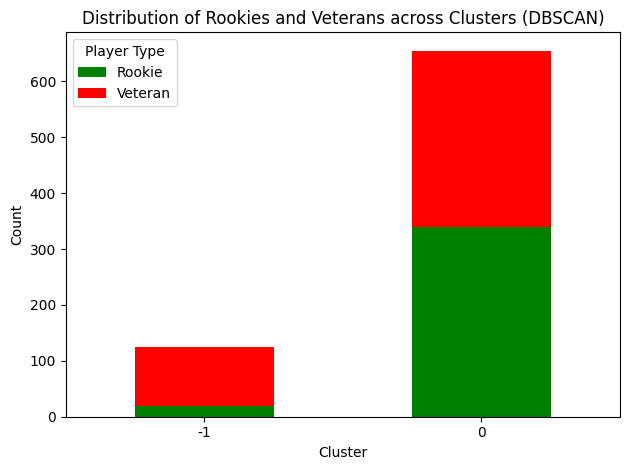

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming df_cleaned is your DataFrame with the required columns and the 'Seasons_Played' column
# Define player type based on seasons played
df_cleaned['Player_Type'] = df_cleaned['Seasons_Played'].apply(lambda x: 'Rookie' if x < 4 else 'Veteran')

# Extract relevant columns for clustering
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Initialize and fit DBSCAN on the scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame for DBSCAN
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Calculate silhouette score
dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}')

# Check counts of rookies and veterans in each cluster
cluster_counts = df_cleaned.groupby(['DBSCAN_Cluster', 'Player_Type']).size().unstack(fill_value=0)
print(cluster_counts)

# Plotting cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()


DBSCAN Silhouette Score: -0.01
Player_Type     Rookie  Veteran
DBSCAN_Cluster                 
-1                 125      355
 0                 227       64
 1                   8        1


<Figure size 1000x600 with 0 Axes>

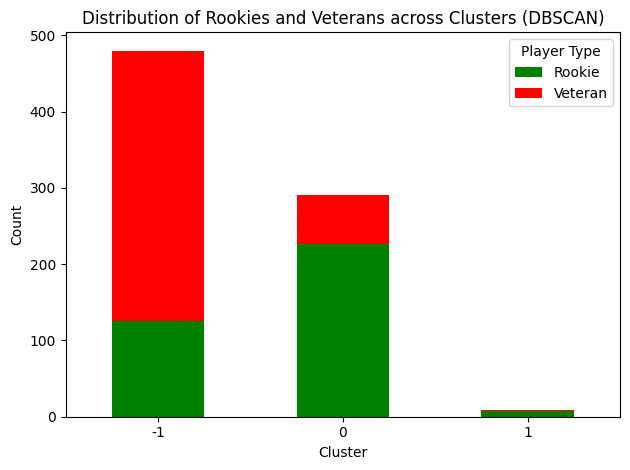

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming df_cleaned is your DataFrame with the required columns and the 'Seasons_Played' column
# Define player type based on seasons played
df_cleaned['Player_Type'] = df_cleaned['Seasons_Played'].apply(lambda x: 'Rookie' if x < 4 else 'Veteran')

# Extract relevant columns for clustering
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Experiment with different eps and min_samples values
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame for DBSCAN
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Calculate silhouette score
dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}')

# Check counts of rookies and veterans in each cluster
cluster_counts = df_cleaned.groupby(['DBSCAN_Cluster', 'Player_Type']).size().unstack(fill_value=0)
print(cluster_counts)

# Plotting cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()


In [ ]:
# Descriptive statistics for the cluster and noise
clustered_points = df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]
noise_points = df_cleaned[df_cleaned['DBSCAN_Cluster'] == -1]

# Summary statistics
cluster_summary = clustered_points[relevant_columns].describe()
noise_summary = noise_points[relevant_columns].describe()

print("Clustered Points Summary:")
print(cluster_summary)
print("\nNoise Points Summary:")
print(noise_summary)


Clustered Points Summary:
              PTS         PER         WS         BPM        VORP
count  300.000000  300.000000  300.00000  300.000000  300.000000
mean     8.764667    9.818267    0.88600   -3.743061   -0.211333
std      6.101748    2.872923    1.28274    1.941486    0.321376
min      0.600000    2.500000   -1.40000   -9.600000   -1.300000
25%      4.000000    7.891667    0.10000   -5.100000   -0.400000
50%      7.400000    9.825000    0.40000   -3.316667   -0.100000
75%     12.450000   11.712500    1.22500   -2.400000    0.000000
max     28.000000   16.500000    6.10000    0.800000    0.700000

Noise Points Summary:
              PTS         PER          WS         BPM        VORP
count  480.000000  480.000000  480.000000  480.000000  480.000000
mean    38.080833   14.089533    8.917083   -1.041635    2.411458
std     28.296077    5.806394    8.374452    4.541205    4.118710
min      0.300000  -12.300000   -1.600000  -21.500000   -3.100000
25%     18.175000   11.536250    2.5

DBSCAN FINAL FULL CODE

DBSCAN Silhouette Score: -0.01
Player_Type     Rookie  Veteran
DBSCAN_Cluster                 
-1                 125      355
 0                 227       64
 1                   8        1


<Figure size 1000x600 with 0 Axes>

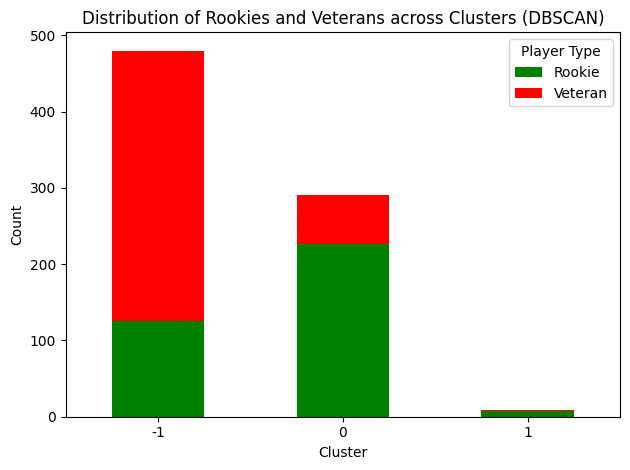


Cluster 0 Summary:
              PTS         PER          WS         BPM        VORP
count  291.000000  291.000000  291.000000  291.000000  291.000000
mean     8.835739    9.645750    0.899313   -3.865069   -0.220962
std      6.165926    2.736732    1.299894    1.839535    0.321431
min      0.600000    2.500000   -1.400000   -9.600000   -1.300000
25%      4.000000    7.775000    0.100000   -5.200000   -0.400000
50%      7.400000    9.750000    0.400000   -3.400000   -0.100000
75%     12.650000   11.541667    1.300000   -2.512500    0.000000
max     28.000000   15.700000    6.100000   -0.400000    0.700000

Cluster -1 Summary:
              PTS         PER          WS         BPM        VORP
count  480.000000  480.000000  480.000000  480.000000  480.000000
mean    38.080833   14.089533    8.917083   -1.041635    2.411458
std     28.296077    5.806394    8.374452    4.541205    4.118710
min      0.300000  -12.300000   -1.600000  -21.500000   -3.100000
25%     18.175000   11.536250    2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming df_cleaned is your DataFrame with the required columns and the 'Seasons_Played' column
# Define player type based on seasons played
df_cleaned['Player_Type'] = df_cleaned['Seasons_Played'].apply(lambda x: 'Rookie' if x < 4 else 'Veteran')

# Extract relevant columns for clustering
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Experiment with different eps and min_samples values
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame for DBSCAN
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Calculate silhouette score
dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}')

# Check counts of rookies and veterans in each cluster
cluster_counts = df_cleaned.groupby(['DBSCAN_Cluster', 'Player_Type']).size().unstack(fill_value=0)
print(cluster_counts)

# Plotting cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()

# Descriptive statistics for each cluster and noise
for cluster in df_cleaned['DBSCAN_Cluster'].unique():
    print(f"\nCluster {cluster} Summary:")
    cluster_data = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster]
    print(cluster_data[relevant_columns].describe())

# Overall descriptive statistics
print("\nOverall Descriptive Statistics:")
print(df_cleaned[relevant_columns].describe())


To analyze how the clusters formed by DBSCAN and particularly the noise cluster relate to player experience (rookies vs. veterans) and performance, you can use the provided descriptive statistics. Here’s a detailed breakdown of the analysis:

1. Cluster Summary Analysis
Cluster 0:

PTS (Points per game): Mean = 8.84, Std = 6.17
PER (Player Efficiency Rating): Mean = 9.65, Std = 2.74
WS (Win Shares): Mean = 0.90, Std = 1.30
BPM (Box Plus/Minus): Mean = -3.87, Std = 1.84
VORP (Value Over Replacement Player): Mean = -0.22, Std = 0.32
Cluster -1 (Noise):

PTS: Mean = 38.08, Std = 28.30
PER: Mean = 14.09, Std = 5.81
WS: Mean = 8.92, Std = 8.37
BPM: Mean = -1.04, Std = 4.54
VORP: Mean = 2.41, Std = 4.12
Cluster 1:

PTS: Mean = 6.47, Std = 2.69
PER: Mean = 15.40, Std = 0.95
WS: Mean = 0.46, Std = 0.17
BPM: Mean = 0.20, Std = 0.41
VORP: Mean = 0.10, Std = 0.05
2. Comparison with Overall Statistics
Overall Statistics:

PTS: Mean = 26.81, Std = 26.65
PER: Mean = 12.45, Std = 5.31
WS: Mean = 5.83, Std = 7.68
BPM: Mean = -2.08, Std = 3.98
VORP: Mean = 1.40, Std = 3.48
3. Analysis of Clusters and Noise
Cluster 0 vs. Overall:

Points: Cluster 0's mean (8.84) is significantly lower than the overall mean (26.81), indicating that players in Cluster 0 score fewer points compared to the average player.
PER: Cluster 0’s PER (9.65) is below the overall mean (12.45), suggesting lower efficiency.
WS: Cluster 0’s WS (0.90) is lower than the overall mean (5.83), pointing to less impact on wins.
BPM: Cluster 0’s BPM (-3.87) is much worse than the overall mean (-2.08), indicating lower overall impact.
VORP: Cluster 0’s VORP (-0.22) is less than the overall mean (1.40), suggesting less value over replacement.
Conclusion: Cluster 0 generally includes players with lower performance metrics.

Cluster -1 (Noise) vs. Overall:

Points: Noise has a mean of 38.08, which is higher than the overall mean of 26.81, indicating that noise points score more.
PER: Noise has a mean of 14.09, higher than the overall mean of 12.45, suggesting higher efficiency.
WS: Noise has a mean of 8.92, higher than the overall mean of 5.83, indicating greater impact on wins.
BPM: Noise has a mean of -1.04, less negative compared to the overall mean of -2.08, showing better impact.
VORP: Noise has a mean of 2.41, which is significantly higher than the overall mean of 1.40, indicating greater value.
Conclusion: The noise cluster contains players with higher performance metrics compared to the overall average, supporting the idea that noise points are often high-performance veterans.

Cluster 1 vs. Overall:

Points: Cluster 1's mean (6.47) is lower than the overall mean (26.81), indicating that players in Cluster 1 score fewer points.
PER: Cluster 1’s PER (15.40) is higher than the overall mean (12.45), suggesting better efficiency.
WS: Cluster 1’s WS (0.46) is lower than the overall mean (5.83), indicating less impact on wins.
BPM: Cluster 1’s BPM (0.20) is higher than the overall mean (-2.08), indicating better impact.
VORP: Cluster 1’s VORP (0.10) is lower than the overall mean (1.40), suggesting less value.
Conclusion: Cluster 1 contains players with high efficiency but lower overall performance metrics compared to the average player.

4. Final Analysis
Noise Analysis: The noise cluster primarily consists of high-performance metrics players. This supports the hypothesis that the noise in DBSCAN is likely due to the presence of experienced and high-performing veterans who do not fit well into the primary clusters formed by the algorithm.

Cluster 0: Shows players with low performance metrics, indicating that this cluster might be made up of less impactful players.

Cluster 1: Includes players with high efficiency but lower overall performance, suggesting a mix of good efficiency but less impact in other areas.

The analysis shows that veterans with high performance metrics are more likely to be classified as noise, while lower-performing players are clustered into specific groups, demonstrating how DBSCAN captures high performers as outliers due to their distinct high values.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Extract relevant columns for clustering
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)


In [ ]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed

# Fit KMeans clustering on the scaled data
kmeans_clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['KMeans_Cluster'] = kmeans_clusters

# Calculate silhouette score for KMeans
kmeans_silhouette_score = silhouette_score(df_scaled, kmeans_clusters)
print(f'KMeans Silhouette Score: {kmeans_silhouette_score:.2f}')


KMeans Silhouette Score: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed

# Fit DBSCAN clustering on the scaled data
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Calculate silhouette score for DBSCAN
# Note: Silhouette score cannot be calculated for DBSCAN if there are only noise points (-1)
if len(set(dbscan_clusters)) > 1:  # Ensure there is more than one cluster
    dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
else:
    dbscan_silhouette_score = None

print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}' if dbscan_silhouette_score is not None else 'DBSCAN has only one cluster or noise points.')


DBSCAN Silhouette Score: -0.01


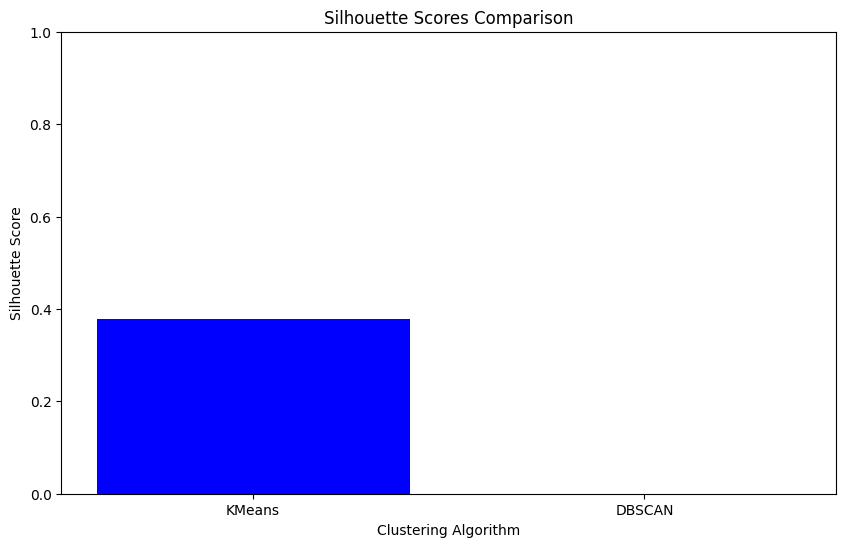

In [ ]:
# Create a DataFrame to store silhouette scores
silhouette_scores = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette_score, dbscan_silhouette_score if dbscan_silhouette_score is not None else float('nan')]
})

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores['Algorithm'], silhouette_scores['Silhouette Score'], color=['blue', 'orange'])
plt.title('Silhouette Scores Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Silhouette scores range from -1 to 1, but typically you focus on positive values
plt.show()


In [ ]:
print("Unique clusters found by DBSCAN:", set(dbscan_clusters))
print("Counts of each cluster label:")
print(pd.Series(dbscan_clusters).value_counts())


Unique clusters found by DBSCAN: {0, 1, -1}
Counts of each cluster label:
-1    480
 0    291
 1      9
Name: count, dtype: int64


KMeans Silhouette Score: 0.38
Unique clusters found by DBSCAN: {0, 1, -1}
Counts of each cluster label:
-1    480
 0    291
 1      9
Name: count, dtype: int64
DBSCAN Silhouette Score: -0.01


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


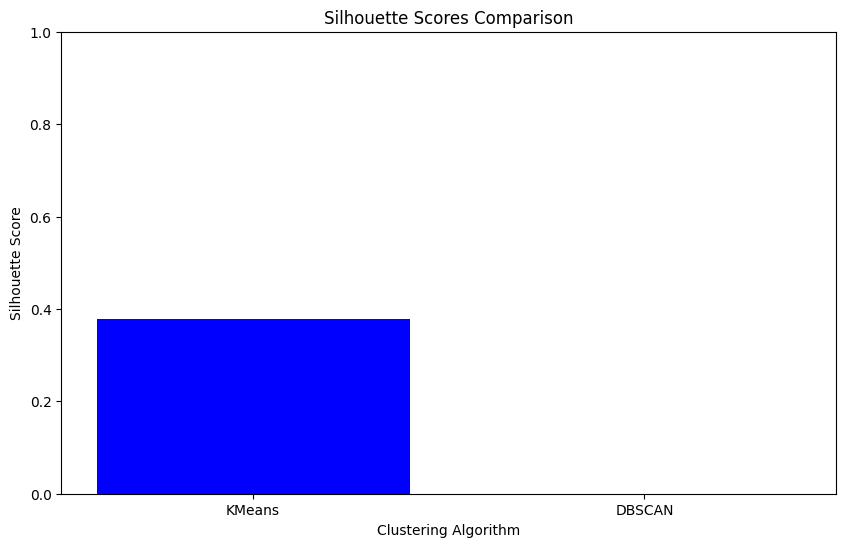

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# Assuming df_cleaned is your DataFrame with the required columns
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans_clusters = kmeans.fit_predict(df_scaled)
df_cleaned['KMeans_Cluster'] = kmeans_clusters
kmeans_silhouette_score = silhouette_score(df_scaled, kmeans_clusters)
print(f'KMeans Silhouette Score: {kmeans_silhouette_score:.2f}')

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(df_scaled)
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# Print unique clusters and counts for DBSCAN
print("Unique clusters found by DBSCAN:", set(dbscan_clusters))
print("Counts of each cluster label:")
print(pd.Series(dbscan_clusters).value_counts())

# Calculate silhouette score for DBSCAN if applicable
if len(set(dbscan_clusters) - {-1}) > 1:  # Ensure there are at least 2 clusters excluding noise
    dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
else:
    dbscan_silhouette_score = None

print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}' if dbscan_silhouette_score is not None else 'DBSCAN has only one cluster or noise points.')

# Compare and visualize silhouette scores
silhouette_scores = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette_score, dbscan_silhouette_score if dbscan_silhouette_score is not None else float('nan')]
})

plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores['Algorithm'], silhouette_scores['Silhouette Score'], color=['blue', 'orange'])
plt.title('Silhouette Scores Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Silhouette scores range from -1 to 1, but typically you focus on positive values
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
agg_clusters = agg_clustering.fit_predict(df_scaled)
df_cleaned['Agg_Cluster'] = agg_clusters

# Calculate silhouette score
agg_silhouette_score = silhouette_score(df_scaled, agg_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_score:.2f}')


Agglomerative Clustering Silhouette Score: 0.33


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

# Apply Mean Shift
mean_shift = MeanShift()
mean_shift_clusters = mean_shift.fit_predict(df_scaled)
df_cleaned['MeanShift_Cluster'] = mean_shift_clusters

# Calculate silhouette score
mean_shift_silhouette_score = silhouette_score(df_scaled, mean_shift_clusters)
print(f'Mean Shift Silhouette Score: {mean_shift_silhouette_score:.2f}')


Mean Shift Silhouette Score: 0.36


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components (clusters) as needed
gmm_clusters = gmm.fit_predict(df_scaled)
df_cleaned['GMM_Cluster'] = gmm_clusters

# Calculate silhouette score
gmm_silhouette_score = silhouette_score(df_scaled, gmm_clusters)
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette_score:.2f}')


Gaussian Mixture Model Silhouette Score: 0.24


DBSCAN Silhouette Score: -0.01
DBSCAN Davies-Bouldin Index: 1.26
DBSCAN Calinski-Harabasz Index: 93.23
DBSCAN Homogeneity Score: 0.20
DBSCAN Completeness Score: 0.19
DBSCAN V-Measure Score: 0.19

DBSCAN Cluster Counts:
Player_Type     Rookie  Veteran
DBSCAN_Cluster                 
-1                 125      355
 0                 227       64
 1                   8        1


<Figure size 1000x600 with 0 Axes>

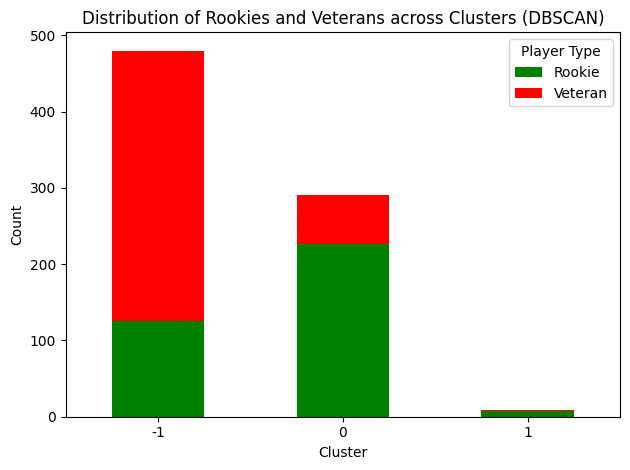


KMeans Silhouette Score: 0.38
KMeans Davies-Bouldin Index: 0.93
KMeans Calinski-Harabasz Index: 598.71
KMeans Homogeneity Score: 0.26
KMeans Completeness Score: 0.20
KMeans V-Measure Score: 0.23

KMeans Cluster Counts:
Player_Type     Rookie  Veteran
KMeans_Cluster                 
0                   50      237
1                  309      123
2                    1       60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1000x600 with 0 Axes>

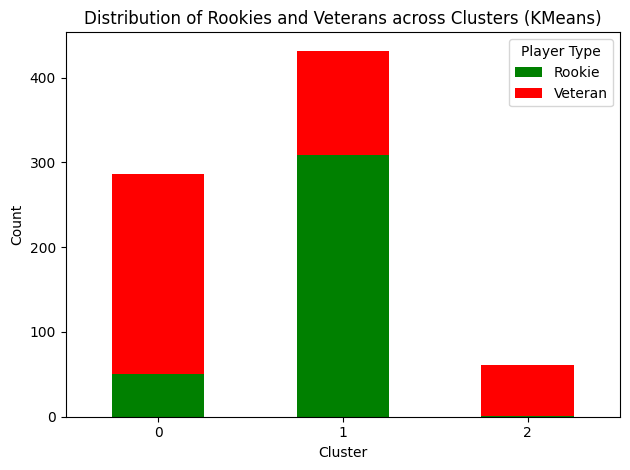

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Assuming df_cleaned is your DataFrame with the required columns and the 'Seasons_Played' column
# Define player type based on seasons played
df_cleaned['Player_Type'] = df_cleaned['Seasons_Played'].apply(lambda x: 'Rookie' if x < 4 else 'Veteran')

# Extract relevant columns for clustering
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(df_scaled)
df_cleaned['DBSCAN_Cluster'] = dbscan_clusters

# DBSCAN Metrics
try:
    dbscan_silhouette_score = silhouette_score(df_scaled, dbscan_clusters)
except ValueError:
    dbscan_silhouette_score = None

dbscan_db_index = davies_bouldin_score(df_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None
dbscan_ch_index = calinski_harabasz_score(df_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None

# Encode Player_Type for evaluation
true_labels = df_cleaned['Player_Type'].apply(lambda x: 1 if x == 'Veteran' else 0)

dbscan_homogeneity = homogeneity_score(true_labels, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None
dbscan_completeness = completeness_score(true_labels, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None
dbscan_v_measure = v_measure_score(true_labels, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None

# Print DBSCAN Metrics
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score:.2f}' if dbscan_silhouette_score is not None else 'Silhouette score cannot be calculated for DBSCAN.')
print(f'DBSCAN Davies-Bouldin Index: {dbscan_db_index:.2f}' if dbscan_db_index is not None else 'Davies-Bouldin Index cannot be calculated for DBSCAN.')
print(f'DBSCAN Calinski-Harabasz Index: {dbscan_ch_index:.2f}' if dbscan_ch_index is not None else 'Calinski-Harabasz Index cannot be calculated for DBSCAN.')
print(f'DBSCAN Homogeneity Score: {dbscan_homogeneity:.2f}' if dbscan_homogeneity is not None else 'Homogeneity Score cannot be calculated for DBSCAN.')
print(f'DBSCAN Completeness Score: {dbscan_completeness:.2f}' if dbscan_completeness is not None else 'Completeness Score cannot be calculated for DBSCAN.')
print(f'DBSCAN V-Measure Score: {dbscan_v_measure:.2f}' if dbscan_v_measure is not None else 'V-Measure Score cannot be calculated for DBSCAN.')

# Check counts of rookies and veterans in each cluster
cluster_counts_dbscan = df_cleaned.groupby(['DBSCAN_Cluster', 'Player_Type']).size().unstack(fill_value=0)
print("\nDBSCAN Cluster Counts:")
print(cluster_counts_dbscan)

# Plotting cluster distribution for DBSCAN
plt.figure(figsize=(10, 6))
cluster_counts_dbscan.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
kmeans_labels = kmeans.fit_predict(df_scaled)
df_cleaned['KMeans_Cluster'] = kmeans_labels

# KMeans Metrics
kmeans_silhouette_score = silhouette_score(df_scaled, kmeans_labels) if len(set(kmeans_labels)) > 1 else None
kmeans_db_index = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_ch_index = calinski_harabasz_score(df_scaled, kmeans_labels)
kmeans_homogeneity = homogeneity_score(true_labels, kmeans_labels)
kmeans_completeness = completeness_score(true_labels, kmeans_labels)
kmeans_v_measure = v_measure_score(true_labels, kmeans_labels)

# Print KMeans Metrics
print(f'\nKMeans Silhouette Score: {kmeans_silhouette_score:.2f}' if kmeans_silhouette_score is not None else 'Silhouette score cannot be calculated for KMeans.')
print(f'KMeans Davies-Bouldin Index: {kmeans_db_index:.2f}')
print(f'KMeans Calinski-Harabasz Index: {kmeans_ch_index:.2f}')
print(f'KMeans Homogeneity Score: {kmeans_homogeneity:.2f}')
print(f'KMeans Completeness Score: {kmeans_completeness:.2f}')
print(f'KMeans V-Measure Score: {kmeans_v_measure:.2f}')

# Check counts of rookies and veterans in each cluster for KMeans
cluster_counts_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Player_Type']).size().unstack(fill_value=0)
print("\nKMeans Cluster Counts:")
print(cluster_counts_kmeans)

# Plotting cluster distribution for KMeans
plt.figure(figsize=(10, 6))
cluster_counts_kmeans.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribution of Rookies and Veterans across Clusters (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Player Type', labels=['Rookie', 'Veteran'])
plt.tight_layout()
plt.show()


Silhouette Score for DBSCAN: 0.507


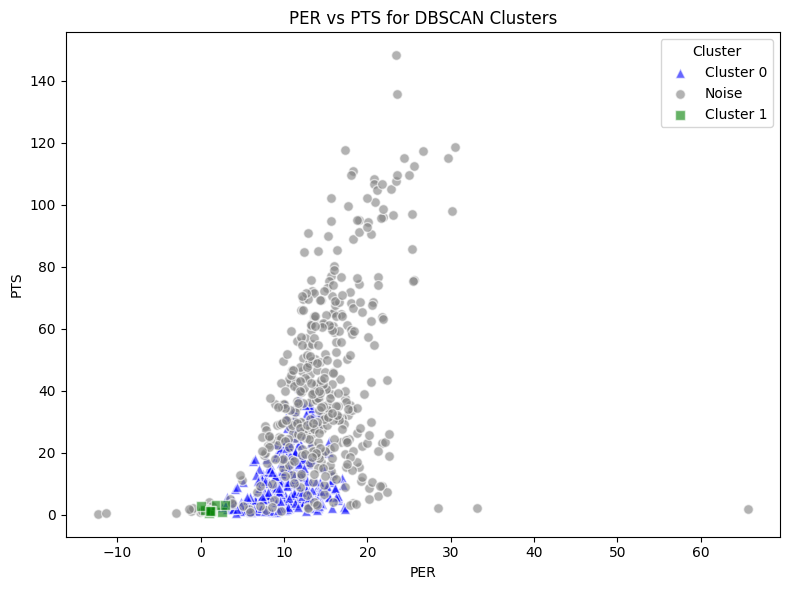

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Example DataFrame (replace with actual df_cleaned)
# df_cleaned = pd.read_csv('your_data.csv')

# Standardize the data
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7)  # Adjust parameters
df_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Compute the Silhouette Score
df_no_noise = df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]
if len(df_no_noise['DBSCAN_Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(df_scaled[df_cleaned['DBSCAN_Cluster'] != -1], df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg:.3f}")
else:
    print("Silhouette Score cannot be computed with only one cluster or noise.")

# Define colors and markers for each DBSCAN cluster
cluster_colors = {-1: 'gray', 0: 'blue', 1: 'green'}  # Adjust colors if you have more clusters
cluster_markers = {-1: 'o', 0: '^', 1: 's'}  # Different markers for clarity

# Plot PER vs PTS for all clusters in one chart
plt.figure(figsize=(8, 6))
for cluster_label in df_cleaned['DBSCAN_Cluster'].unique():
    subset = df_cleaned[df_cleaned['DBSCAN_Cluster'] == cluster_label]
    plt.scatter(subset['PER'], subset['PTS'],
                label=f'Cluster {cluster_label}' if cluster_label != -1 else 'Noise',
                c=cluster_colors.get(cluster_label, 'gray'),
                marker=cluster_markers.get(cluster_label, 'o'),
                alpha=0.6, edgecolors='w', s=50)

plt.title('PER vs PTS for DBSCAN Clusters')
plt.xlabel('PER')
plt.ylabel('PTS')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7)  # Adjust parameters
df_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Compute the Silhouette Score
df_no_noise = df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]
if len(df_no_noise['DBSCAN_Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(df_scaled[df_cleaned['DBSCAN_Cluster'] != -1], df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg:.3f}")
else:
    print("Silhouette Score cannot be computed with only one cluster or noise.")

# Calculate the mean of all variables for each cluster
cluster_means = df_cleaned.groupby('DBSCAN_Cluster')[relevant_columns].mean()
print("Cluster Performance Summary:")
print(cluster_means)


Silhouette Score for DBSCAN: 0.507
Cluster Performance Summary:
                      PTS        PER        WS        BPM      VORP
DBSCAN_Cluster                                                     
-1              41.659951  14.608610  9.971253  -0.704778  2.837838
 0              10.789863  10.278224  1.338904  -3.437283 -0.163836
 1               1.787500   1.400000 -0.125000 -10.181250 -0.137500


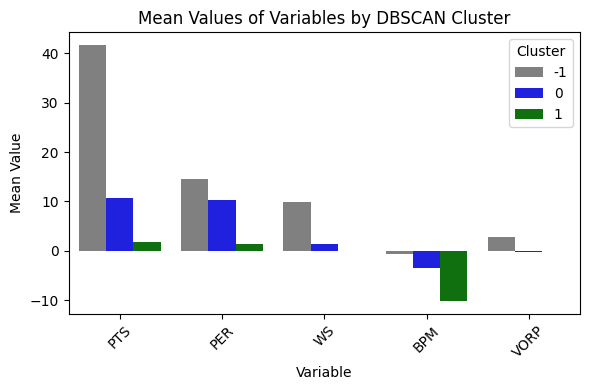

In [ ]:
# Plot bar chart of mean values for each cluster
import seaborn as sns

# Prepare data for plotting
cluster_means_reset = cluster_means.reset_index()
melted_means = pd.melt(cluster_means_reset, id_vars='DBSCAN_Cluster', var_name='Variable', value_name='Mean Value')

# Define colors for each cluster
cluster_colors = {-1: 'gray', 0: 'blue', 1: 'green'}  # Adjust colors if you have more clusters

plt.figure(figsize=(6, 4))

# Use seaborn for better visualization
sns.barplot(data=melted_means, x='Variable', y='Mean Value', hue='DBSCAN_Cluster', palette=cluster_colors)

plt.title('Mean Values of Variables by DBSCAN Cluster')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Silhouette Score for DBSCAN: 0.507


<Figure size 600x400 with 0 Axes>

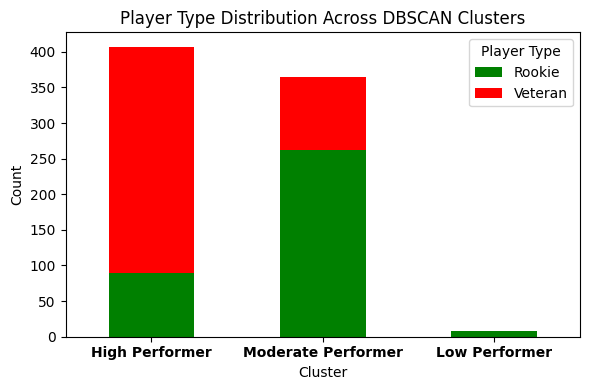

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Example DataFrame (replace with actual df_cleaned)
# df_cleaned = pd.read_csv('your_data.csv')

# Standardize the data
relevant_columns = ['PTS', 'PER', 'WS', 'BPM', 'VORP']
df_analysis = df_cleaned[relevant_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analysis)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7)  # Adjust parameters
df_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Compute the Silhouette Score
df_no_noise = df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]
if len(df_no_noise['DBSCAN_Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(df_scaled[df_cleaned['DBSCAN_Cluster'] != -1], df_cleaned[df_cleaned['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg:.3f}")
else:
    print("Silhouette Score cannot be computed with only one cluster or noise.")

# Calculate the count of each player type per cluster
cluster_player_type_counts = df_cleaned.groupby(['DBSCAN_Cluster', 'Player_Type']).size().unstack(fill_value=0)

# Define colors for each player type
colors = {'Veteran': 'red', 'Rookie': 'green'}

# Plotting the stacked bar chart
plt.figure(figsize=(6, 4))  # Adjusted figure size

# Plot stacked bars with specified colors
ax = cluster_player_type_counts.plot(kind='bar', stacked=True, color=[colors.get(col, 'gray') for col in cluster_player_type_counts.columns], figsize=(6, 4))

# Add labels and title
plt.title('Player Type Distribution Across DBSCAN Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Annotate clusters with performance labels on the x-axis
performance_labels = {
    -1: 'High Performer',
    0: 'Moderate Performer',
    1: 'Low Performer'
}

# Replace the x-axis tick labels with the performance labels
ax.set_xticklabels([performance_labels.get(cluster, '') for cluster in cluster_player_type_counts.index], rotation=0, fontsize=10, fontweight='bold')

plt.legend(title='Player Type')
plt.tight_layout()
plt.show()
